## Music Recommendation System (Data Processing and Analysis)

### Framing the Problem

This project is aimed upon building a music recommendation system that gives the user recommendations on music based on his music taste by analysing his previously heard music and playlist. This project is done in two ways, using 'User - to - User Recommendation' and 'Item - to - Item Recommendation'. Birch, MiniBatchKMeans and KMeans algorithms are being used along with 'Surprise' module to compute the similarity between recommendations and user's already existing playlist for evaluation

### Obtaining Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import missingno as ms
%matplotlib inline

In [2]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 2000)

In [3]:
echonest = pd.read_csv('datasets/raw/echonest.csv')
features = pd.read_csv('datasets/raw/features.csv')
genres = pd.read_csv('datasets/raw/genres.csv')
tracks = pd.read_csv('datasets/raw/tracks.csv')

C:\Users\User\AppData\Local\Temp\ipykernel_1668\3288836823.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,11,13,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249) have mixed types. Specify dtype opt

### Working with 'Echonest' dataset

#### Analysing Data

In [4]:
echonest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13132 entries, 0 to 13131
Columns: 250 entries, Unnamed: 0 to echonest.248
dtypes: object(250)
memory usage: 25.0+ MB


In [5]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106577 entries, 0 to 106576
Columns: 519 entries, feature to zcr.6
dtypes: object(519)
memory usage: 422.0+ MB


In [6]:
genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   genre_id   163 non-null    int64 
 1   #tracks    163 non-null    int64 
 2   parent     163 non-null    int64 
 3   title      163 non-null    object
 4   top_level  163 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 6.5+ KB


In [7]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106576 entries, 0 to 106575
Data columns (total 53 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  106575 non-null  object
 1   album       106575 non-null  object
 2   album.1     103046 non-null  object
 3   album.2     70295 non-null   object
 4   album.3     15296 non-null   object
 5   album.4     106575 non-null  object
 6   album.5     106575 non-null  object
 7   album.6     83150 non-null   object
 8   album.7     106575 non-null  object
 9   album.8     18061 non-null   object
 10  album.9     106575 non-null  object
 11  album.10    105550 non-null  object
 12  album.11    106575 non-null  object
 13  album.12    100067 non-null  object
 14  artist      22712 non-null   object
 15  artist.1    5376 non-null    object
 16  artist.2    14272 non-null   object
 17  artist.3    71157 non-null   object
 18  artist.4    106575 non-null  object
 19  artist.5    105719 non-

In [8]:
echonest.head(10)

Unnamed: 0        echonest      echonest.1      echonest.2  \
0        NaN  audio_features  audio_features  audio_features   
1        NaN    acousticness    danceability          energy   
2   track_id             NaN             NaN             NaN   
3          2    0.4166752327    0.6758939853    0.6344762684   
4          3    0.3744077685    0.5286430621    0.8174611317   
5          5    0.0435668989    0.7455658702    0.7014699916   
6         10    0.9516699648    0.6581786543    0.9245251615   
7        134    0.4522173071    0.5132380502    0.5604099311   
8        139    0.1065495253    0.2609111726    0.6070668636   
9        140    0.3763124975    0.7340790229    0.2656847734   

         echonest.3      echonest.4      echonest.5      echonest.6  \
0    audio_features  audio_features  audio_features  audio_features   
1  instrumentalness        liveness     speechiness           tempo   
2               NaN             NaN             NaN             NaN   
3      0.0106280683    0.1776465712    0.1593100648  165.9220000000   
4      0.0018511032    0.1058799438    0.4618181276  126.9570000000   
5      0.0006967990    0.3731433124    0.1245953419  100.2600000000   
6      0.9654270154    0.1154738842    0.0329852191  111.5620000000   
7      0.0194426943    0.0965666940    0.5255193792  114.2900000000   
8      0.8350869898    0.2236762711    0.0305692764  196.9610000000   
9      0.6695811237    0.0859951222    0.0390682262  107.9520000000   

       echonest.7  echonest.8         echonest.9      echonest.10  \
0  audio_features    metadata           metadata         metadata   
1         valence  album_date         album_name  artist_latitude   
2             NaN         NaN                NaN              NaN   
3    0.5766609880         NaN                NaN    32.6783000000   
4    0.2692402421         NaN                NaN    32.6783000000   
5    0.6216612236         NaN                NaN    32.6783000000   
6    0.9635898919  2008-03-11  Constant Hitmaker    39.9523000000   
7    0.8940722715         NaN                NaN    32.6783000000   
8    0.1602670903         NaN                NaN    41.8239000000   
9    0.6099912728         NaN                NaN    41.8239000000   

            echonest.11       echonest.12                        echonest.13  \
0              metadata          metadata                           metadata   
1       artist_location  artist_longitude                        artist_name   
2                   NaN               NaN                                NaN   
3           Georgia, US    -83.2230000000                               AWOL   
4           Georgia, US    -83.2230000000                               AWOL   
5           Georgia, US    -83.2230000000                               AWOL   
6  Philadelphia, PA, US    -75.1624000000                          Kurt Vile   
7           Georgia, US    -83.2230000000                               AWOL   
8    Providence, RI, US    -71.4120000000  Alec K. Redfearn and the Eyesores   
9    Providence, RI, US    -71.4120000000  Alec K. Redfearn and the Eyesores   

             echonest.14            echonest.15              echonest.16  \
0               metadata                  ranks                    ranks   
1                release  artist_discovery_rank  artist_familiarity_rank   
2                    NaN                    NaN                      NaN   
3   AWOL - A Way Of Life                    NaN                      NaN   
4   AWOL - A Way Of Life                    NaN                      NaN   
5   AWOL - A Way Of Life                    NaN                      NaN   
6      Constant Hitmaker        2635.0000000000          2544.0000000000   
7   AWOL - A Way Of Life                    NaN                      NaN   
8  Every Man For Himself      149495.0000000000        104037.0000000000   
9         The Blind Spot      149495.0000000000        104037.0000000000   

              echonest.17         ech

#### Feature Engineering

<Axes: >

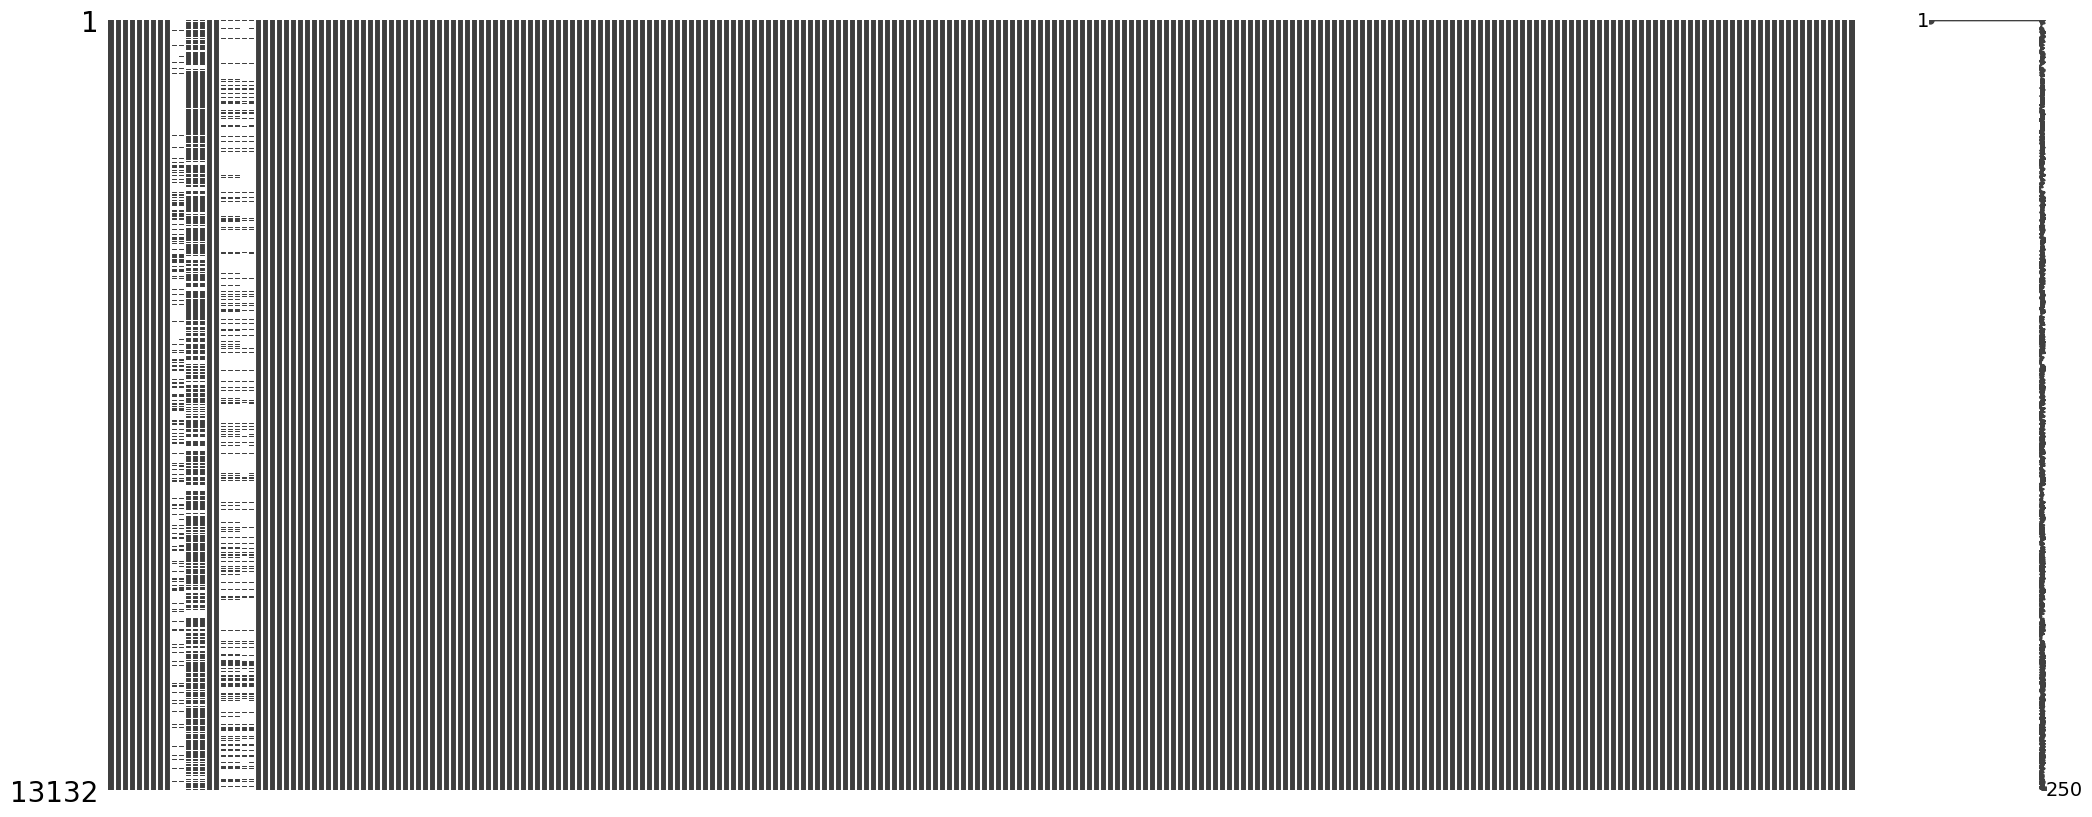

In [9]:
ms.matrix(echonest)

In [10]:
echonest.drop(['echonest.8', 'echonest.9', 'echonest.15', 'echonest.16', 'echonest.17', 'echonest.18', 'echonest.19'], axis=1, inplace=True)

In [11]:
echonest.tail(15)

Unnamed: 0  echonest echonest.1 echonest.2 echonest.3 echonest.4  \
13117     124818  0.092864    0.64608      0.772   0.569069   0.442961   
13118     124819  0.212196   0.691758   0.801736   0.426629   0.231404   
13119     124820  0.059584   0.702435   0.622037   0.099508    0.23637   
13120     124850  0.105487   0.690411   0.546009   0.266321   0.205493   
13121     124851  0.034877   0.641127   0.594074   0.478906   0.399061   
13122     124852  0.702553     0.7289   0.590636    0.41506   0.118425   
13123     124853  0.020307   0.689575   0.676306   0.891817   0.095915   
13124     124854  0.026545   0.667363   0.657399   0.364107   0.108031   
13125     124855  0.160281   0.604249   0.554242   0.728696   0.351249   
13126     124856  0.112268   0.581255   0.665963   0.853041   0.100966   
13127     124857  0.007592   0.790364   0.719288   0.853114   0.720715   
13128     124862  0.041498   0.843077   0.536496   0.865151   0.547949   
13129     124863  0.000124   0.609686   0.895136   0.846624   0.632903   
13130     124864  0.327576   0.574426   0.548327   0.452867   0.075928   
13131     124911  0.993606   0.499339   0.050622   0.945677   0.095965   

      echonest.5 echonest.6 echonest.7 echonest.10  \
13117   0.109521    174.059   0.710703     52.1082   
13118   0.058453    119.985    0.41896         NaN   
13119    0.05886     96.006   0.231796         NaN   
13120   0.031643     93.016   0.407481     52.1082   
13121   0.041473     96.007    0.64312     52.1082   
13122   0.037389      100.0   0.198466     52.1082   
13123   0.030968    120.023   0.438201     52.1082   
13124   0.042832    121.004   0.460545     52.1082   
13125   0.175388    167.975   0.402043     52.1082   
13126   0.041647     121.01   0.387918     52.1082   
13127    0.08255    141.332   0.890461     52.1082   
13128   0.074001    101.975   0.476845     52.1082   
13129   0.051517    129.996   0.496667     52.1082   
13130   0.033388    142.009   0.569274     52.1082   
13131   0.065189    119.965   0.204652     35.7497   

                                   echonest.11 echonest.12      echonest.13  \
13117                              Netherlands     5.32986            Basic   
13118                                      NaN         NaN        Leisure-B   
13119                                      NaN         NaN        Leisure-B   
13120                              Netherlands     5.32986            Basic   
13121                              Netherlands     5.32986            Basic   
13122                              Netherlands     5.32986            Basic   
13123                              Netherlands     5.32986            Basic   
13124                              Netherlands     5.32986            Basic   
13125                              Netherlands     5.32986            Basic   
13126                              Netherlands     5.32986            Basic   
13127                              Netherlands     5.32986            Basic   
13128                              Netherlands     5.32986            Basic   
13129                              Netherlands     5.32986            Basic   
13130                              Netherlands     5.32986            Basic   
13131  Higashiyamato-shi, Tokyo Prefecture, JP     139.422  Yusuke Tsutsumi   

                echonest.14 echonest.20 echonest.21 echonest.22 echonest.23  \
13117       HUmanworkshop 1    0.430808    0.456871    0.486749         0.0   
13118       HUmanworkshop 1    0.309424    0.208342    0.323249         0.0   
13119       HUmanworkshop 1    0.309424    0.208342    0.323249    0.000011   
13120  Do You Know The Word    0.430808    0.456871    0.486749         0.0   
13121  Do You Know The Word    0.430808    0.456871    0.486749         0.0   
13122  Do You Know The Word    0.430808    0.456871    0.486749         0.0   
13123  Do You Know The Word    0.430808    0.456871    0.486749    0.000125   
13124  Do You Know The Word    0.430808    0.456871    0.48

<Axes: >

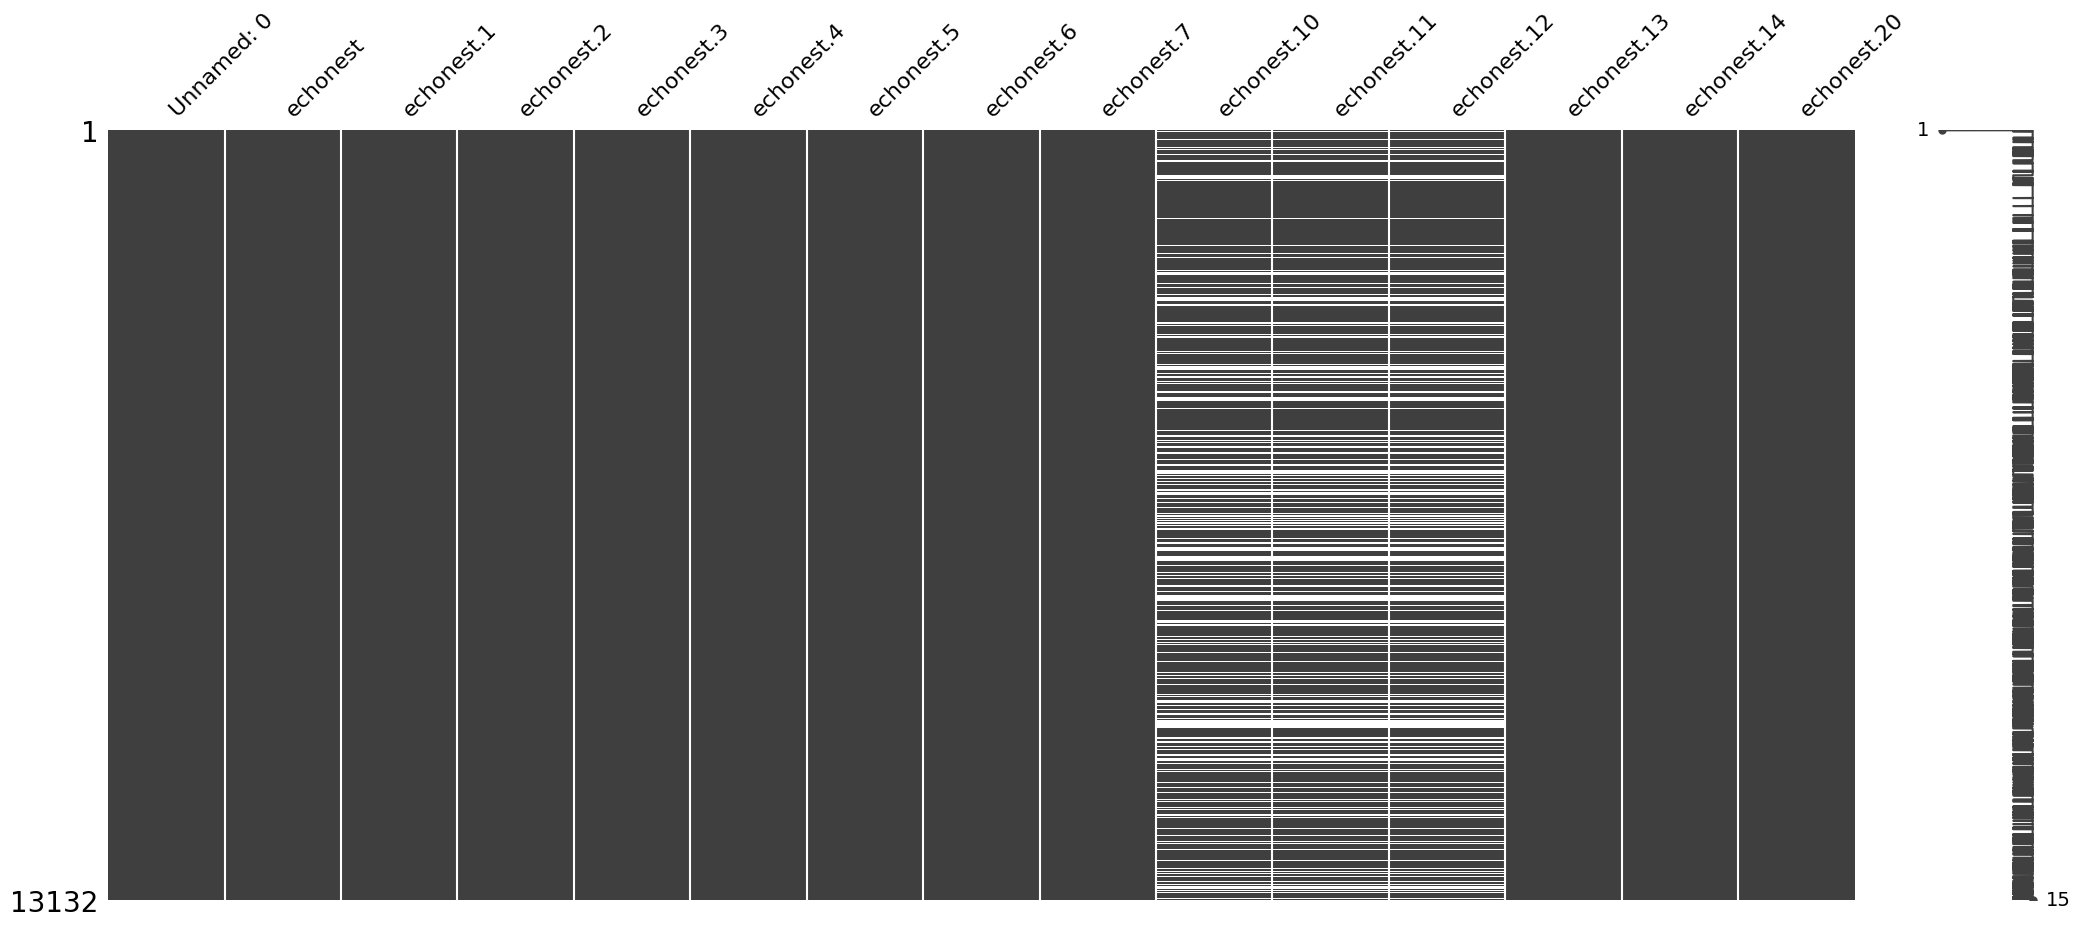

In [12]:
ms.matrix(echonest.iloc[:, 0:15])

In [13]:
echonest.drop(['echonest.10', 'echonest.11', 'echonest.12'], axis=1, inplace=True)

<Axes: >

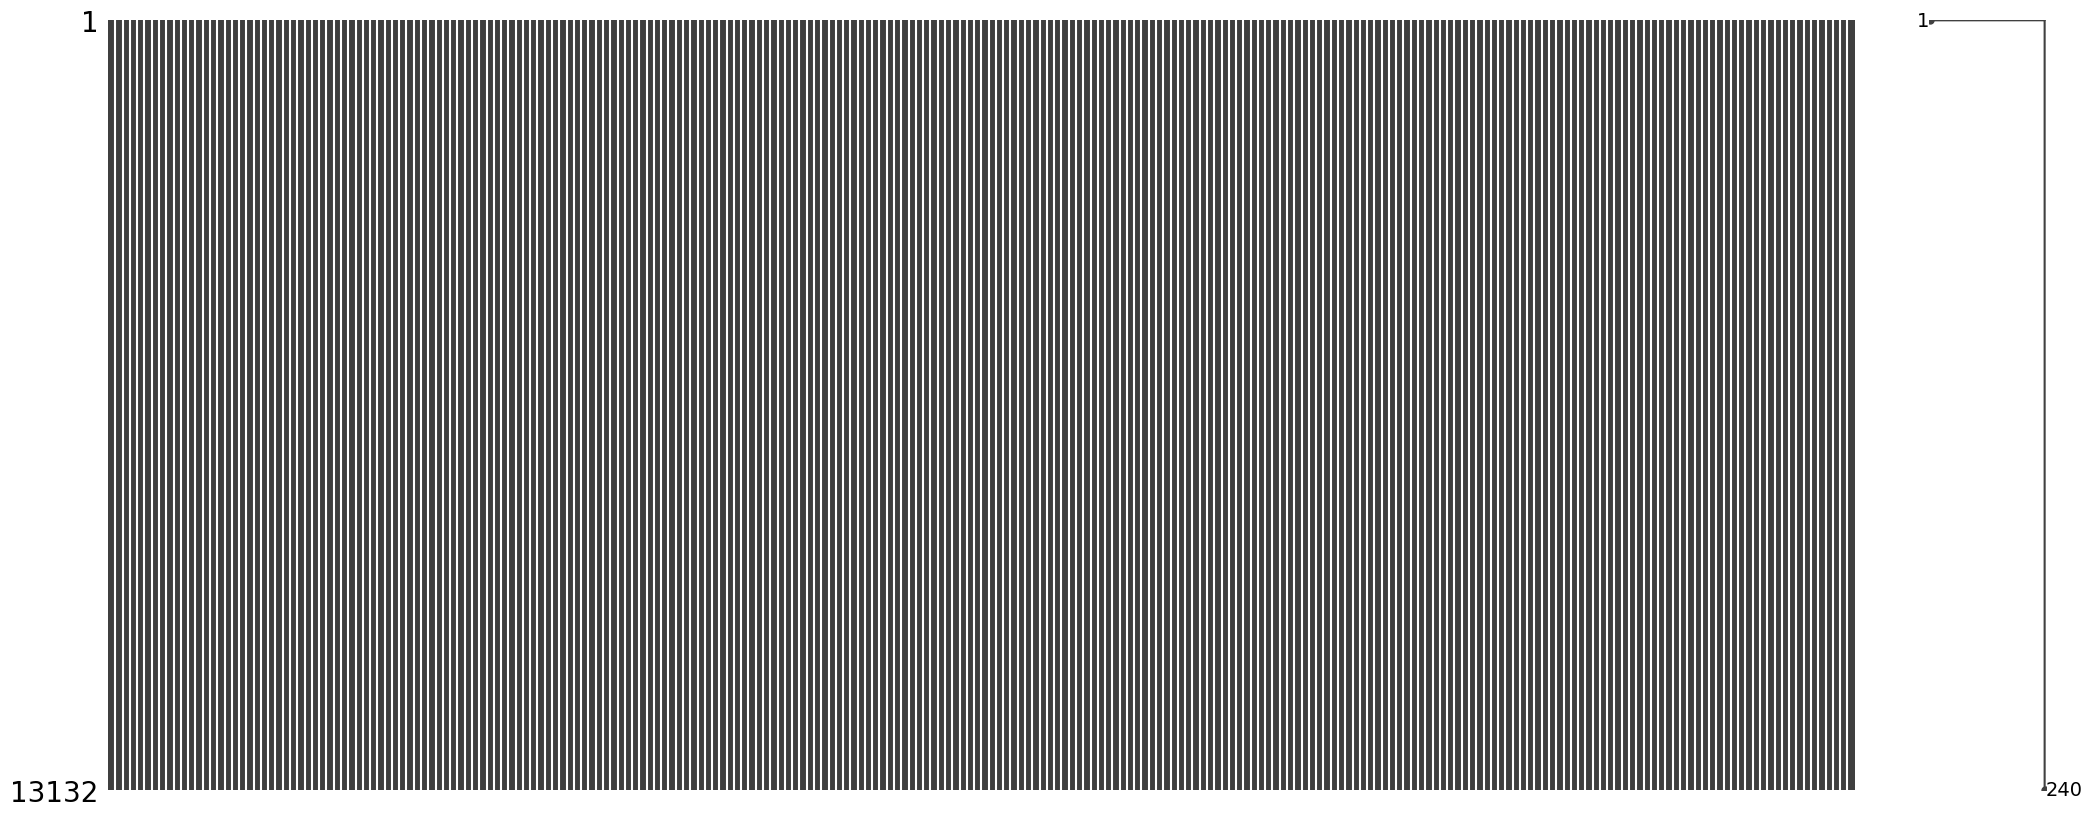

In [14]:
ms.matrix(echonest)

In [15]:
echonest.head(10)

Unnamed: 0        echonest      echonest.1      echonest.2  \
0        NaN  audio_features  audio_features  audio_features   
1        NaN    acousticness    danceability          energy   
2   track_id             NaN             NaN             NaN   
3          2    0.4166752327    0.6758939853    0.6344762684   
4          3    0.3744077685    0.5286430621    0.8174611317   
5          5    0.0435668989    0.7455658702    0.7014699916   
6         10    0.9516699648    0.6581786543    0.9245251615   
7        134    0.4522173071    0.5132380502    0.5604099311   
8        139    0.1065495253    0.2609111726    0.6070668636   
9        140    0.3763124975    0.7340790229    0.2656847734   

         echonest.3      echonest.4      echonest.5      echonest.6  \
0    audio_features  audio_features  audio_features  audio_features   
1  instrumentalness        liveness     speechiness           tempo   
2               NaN             NaN             NaN             NaN   
3      0.0106280683    0.1776465712    0.1593100648  165.9220000000   
4      0.0018511032    0.1058799438    0.4618181276  126.9570000000   
5      0.0006967990    0.3731433124    0.1245953419  100.2600000000   
6      0.9654270154    0.1154738842    0.0329852191  111.5620000000   
7      0.0194426943    0.0965666940    0.5255193792  114.2900000000   
8      0.8350869898    0.2236762711    0.0305692764  196.9610000000   
9      0.6695811237    0.0859951222    0.0390682262  107.9520000000   

       echonest.7                        echonest.13            echonest.14  \
0  audio_features                           metadata               metadata   
1         valence                        artist_name                release   
2             NaN                                NaN                    NaN   
3    0.5766609880                               AWOL   AWOL - A Way Of Life   
4    0.2692402421                               AWOL   AWOL - A Way Of Life   
5    0.6216612236                               AWOL   AWOL - A Way Of Life   
6    0.9635898919                          Kurt Vile      Constant Hitmaker   
7    0.8940722715                               AWOL   AWOL - A Way Of Life   
8    0.1602670903  Alec K. Redfearn and the Eyesores  Every Man For Himself   
9    0.6099912728  Alec K. Redfearn and the Eyesores         The Blind Spot   

        echonest.20         echonest.21        echonest.22      echonest.23  \
0   social_features     social_features    social_features  social_features   
1  artist_discovery  artist_familiarity  artist_hotttnesss    song_currency   
2               NaN                 NaN                NaN              NaN   
3      0.3889898648        0.3867400000       0.4063700000     0.0000000000   
4      0.3889898648        0.3867400000       0.4063700000     0.0000000000   
5      0.3889898648        0.3867400000       0.4063700000     0.0000000000   
6      0.5573390067        0.6142720000       0.7983870000     0.0051579926   
7      0.3889898648        0.3867400000       0.4063700000     0.0000000000   
8      0.3889228586        0.3307840000       0.4063000000     0.0002500000   
9      0.3889228586        0.3307840000       0.4063000000     0.0000000000   

       echonest.24        echonest.25        echonest.26        echonest.27  \
0  social_features  temporal_features  temporal_features  temporal_features   
1  song_hotttnesss                000                001                002   
2              NaN                NaN                NaN                NaN   
3     0.0000000000       0.8772332668       0.5889111161       0.3542430103   
4     0.0000000000       0.5344291329       0.5374142528       0.4432994723   
5     0.0000000000       0.5480925441       0.7201917768       0.3892570734   
6     0.3545160000       0.3114041686       0.7114023566       0.3219138086   
7     0.0000000000       0.6108492613       0.5691694617       0.4284938276   
8     0.0385500000       0.8002824187       0.5863723159       0

In [16]:
echonest.drop(0, axis=0, inplace=True)

In [17]:
echonest.iloc[0, 0]

nan

In [18]:
echonest.iloc[1, 0]

'track_id'

In [19]:
echonest.iloc[0, 0] = echonest.iloc[1, 0]

In [20]:
echonest.head()

Unnamed: 0      echonest    echonest.1    echonest.2        echonest.3  \
1   track_id  acousticness  danceability        energy  instrumentalness   
2   track_id           NaN           NaN           NaN               NaN   
3          2  0.4166752327  0.6758939853  0.6344762684      0.0106280683   
4          3  0.3744077685  0.5286430621  0.8174611317      0.0018511032   
5          5  0.0435668989  0.7455658702  0.7014699916      0.0006967990   

     echonest.4    echonest.5      echonest.6    echonest.7  echonest.13  \
1      liveness   speechiness           tempo       valence  artist_name   
2           NaN           NaN             NaN           NaN          NaN   
3  0.1776465712  0.1593100648  165.9220000000  0.5766609880         AWOL   
4  0.1058799438  0.4618181276  126.9570000000  0.2692402421         AWOL   
5  0.3731433124  0.1245953419  100.2600000000  0.6216612236         AWOL   

            echonest.14       echonest.20         echonest.21  \
1               release  artist_discovery  artist_familiarity   
2                   NaN               NaN                 NaN   
3  AWOL - A Way Of Life      0.3889898648        0.3867400000   
4  AWOL - A Way Of Life      0.3889898648        0.3867400000   
5  AWOL - A Way Of Life      0.3889898648        0.3867400000   

         echonest.22    echonest.23      echonest.24   echonest.25  \
1  artist_hotttnesss  song_currency  song_hotttnesss           000   
2                NaN            NaN              NaN           NaN   
3       0.4063700000   0.0000000000     0.0000000000  0.8772332668   
4       0.4063700000   0.0000000000     0.0000000000  0.5344291329   
5       0.4063700000   0.0000000000     0.0000000000  0.5480925441   

    echonest.26   echonest.27   echonest.28   echonest.29   echonest.30  \
1           001           002           003           004           005   
2           NaN           NaN           NaN           NaN           NaN   
3  0.5889111161  0.3542430103  0.2950901389  0.2984125018  0.3094303906   
4  0.5374142528  0.4432994723  0.3908788860  0.3445729315  0.3664476275   
5  0.7201917768  0.3892570734  0.3449338675  0.3612995744  0.4025429785   

    echonest.31   echonest.32   echonest.33   echonest.34   echonest.35  \
1           006           007           008           009           010   
2           NaN           NaN           NaN           NaN           NaN   
3  0.3044959009  0.3345789909  0.2494945079  0.2596555948  0.3183763623   
4  0.4194553494  0.7477657795  0.4609008729  0.3923788667  0.4745588005   
5  0.4340436757  0.3881373107  0.5124866962  0.5257551670  0.4253708720   

    echonest.36   echonest.37   echonest.38   echonest.39   echonest.40  \
1           011           012           013           014           015   
2           NaN           NaN           NaN           NaN           NaN   
3  0.3719735742  1.0000000000  0.5709999800  0.2779999971  0.2099999934   
4  0.4067287743  0.5059999824  0.5145000219  0.3869999945  0.3235000074   
5  0.4468963742  0.5109999776  0.7720000148  0.3610000014  0.2879999876   

    echonest.41   echonest.42   echonest.43   echonest.44   echonest.45  \
1           016           017           018           019           020   
2           NaN           NaN           NaN           NaN           NaN   
3  0.2150000036  0.2285000086  0.2375000119  0.2790000141  0.1685000062   
4  0.2804999948  0.3134999871  0.3454999924  0.8980000019  0.4365000129   
5  0.3310000002  0.3720000088  0.3589999974  0.2790000141  0.4429999888   

    echonest.46   echonest.47   echonest.48   echonest.49   echonest.50  \
1           021           022           023           024           025   
2           NaN           NaN           NaN           NaN           NaN   
3  0.1685000062  0.2790000141  0.3324999809  0.0498478077  0.1042116806   
4  0.3384999931  0.3980000019  0.3479999900  0.0792073756  0.0833189711   
5  0.4839999974  0.3680000007  0.3970000148  0.0810512751  0.0783000439   

    echonest.51   ech

In [21]:
echonest.drop(2, axis=0, inplace=True)

In [22]:
echonest.columns = echonest.iloc[0]

In [23]:
echonest.head()

1  track_id  acousticness  danceability        energy  instrumentalness  \
1  track_id  acousticness  danceability        energy  instrumentalness   
3         2  0.4166752327  0.6758939853  0.6344762684      0.0106280683   
4         3  0.3744077685  0.5286430621  0.8174611317      0.0018511032   
5         5  0.0435668989  0.7455658702  0.7014699916      0.0006967990   
6        10  0.9516699648  0.6581786543  0.9245251615      0.9654270154   

1      liveness   speechiness           tempo       valence  artist_name  \
1      liveness   speechiness           tempo       valence  artist_name   
3  0.1776465712  0.1593100648  165.9220000000  0.5766609880         AWOL   
4  0.1058799438  0.4618181276  126.9570000000  0.2692402421         AWOL   
5  0.3731433124  0.1245953419  100.2600000000  0.6216612236         AWOL   
6  0.1154738842  0.0329852191  111.5620000000  0.9635898919    Kurt Vile   

1               release  artist_discovery  artist_familiarity  \
1               release  artist_discovery  artist_familiarity   
3  AWOL - A Way Of Life      0.3889898648        0.3867400000   
4  AWOL - A Way Of Life      0.3889898648        0.3867400000   
5  AWOL - A Way Of Life      0.3889898648        0.3867400000   
6     Constant Hitmaker      0.5573390067        0.6142720000   

1  artist_hotttnesss  song_currency  song_hotttnesss           000  \
1  artist_hotttnesss  song_currency  song_hotttnesss           000   
3       0.4063700000   0.0000000000     0.0000000000  0.8772332668   
4       0.4063700000   0.0000000000     0.0000000000  0.5344291329   
5       0.4063700000   0.0000000000     0.0000000000  0.5480925441   
6       0.7983870000   0.0051579926     0.3545160000  0.3114041686   

1           001           002           003           004           005  \
1           001           002           003           004           005   
3  0.5889111161  0.3542430103  0.2950901389  0.2984125018  0.3094303906   
4  0.5374142528  0.4432994723  0.3908788860  0.3445729315  0.3664476275   
5  0.7201917768  0.3892570734  0.3449338675  0.3612995744  0.4025429785   
6  0.7114023566  0.3219138086  0.5006007552  0.2509630620  0.3213164508   

1           006           007           008           009           010  \
1           006           007           008           009           010   
3  0.3044959009  0.3345789909  0.2494945079  0.2596555948  0.3183763623   
4  0.4194553494  0.7477657795  0.4609008729  0.3923788667  0.4745588005   
5  0.4340436757  0.3881373107  0.5124866962  0.5257551670  0.4253708720   
6  0.7342495322  0.3251882195  0.3730122745  0.2358400822  0.3687555194   

1           011           012           013           014           015  \
1           011           012           013           014           015   
3  0.3719735742  1.0000000000  0.5709999800  0.2779999971  0.2099999934   
4  0.4067287743  0.5059999824  0.5145000219  0.3869999945  0.3235000074   
5  0.4468963742  0.5109999776  0.7720000148  0.3610000014  0.2879999876   
6  0.4407747984  0.2630000114  0.7360000014  0.2730000019  0.4259999990   

1           016           017           018           019           020  \
1           016           017           018           019           020   
3  0.2150000036  0.2285000086  0.2375000119  0.2790000141  0.1685000062   
4  0.2804999948  0.3134999871  0.3454999924  0.8980000019  0.4365000129   
5  0.3310000002  0.3720000088  0.3589999974  0.2790000141  0.4429999888   
6  0.2140000015  0.2879999876  0.8100000024  0.2460000068  0.2949999869   

1           021           022           023           024           025  \
1           021           022           023           024           025   
3  0.1685000062  0.2790000141  0.3324999809  0.0498478077  0.1042116806   
4  0.3384999931  0.3980000019  0.3479999900  0.0792073756  0.0833189711   
5  0.4839999974  0.3680000007  0.3970000148  0.0810512751  0.0783000439   
6  0.1640000045  0.3109999895  0.3860000074  0.0339685380  0.0706918016   

1           026          

In [24]:
echonest.drop(1, axis=0, inplace=True)

In [25]:
echonest.head()

1 track_id  acousticness  danceability        energy instrumentalness  \
3        2  0.4166752327  0.6758939853  0.6344762684     0.0106280683   
4        3  0.3744077685  0.5286430621  0.8174611317     0.0018511032   
5        5  0.0435668989  0.7455658702  0.7014699916     0.0006967990   
6       10  0.9516699648  0.6581786543  0.9245251615     0.9654270154   
7      134  0.4522173071  0.5132380502  0.5604099311     0.0194426943   

1      liveness   speechiness           tempo       valence artist_name  \
3  0.1776465712  0.1593100648  165.9220000000  0.5766609880        AWOL   
4  0.1058799438  0.4618181276  126.9570000000  0.2692402421        AWOL   
5  0.3731433124  0.1245953419  100.2600000000  0.6216612236        AWOL   
6  0.1154738842  0.0329852191  111.5620000000  0.9635898919   Kurt Vile   
7  0.0965666940  0.5255193792  114.2900000000  0.8940722715        AWOL   

1               release artist_discovery artist_familiarity artist_hotttnesss  \
3  AWOL - A Way Of Life     0.3889898648       0.3867400000      0.4063700000   
4  AWOL - A Way Of Life     0.3889898648       0.3867400000      0.4063700000   
5  AWOL - A Way Of Life     0.3889898648       0.3867400000      0.4063700000   
6     Constant Hitmaker     0.5573390067       0.6142720000      0.7983870000   
7  AWOL - A Way Of Life     0.3889898648       0.3867400000      0.4063700000   

1 song_currency song_hotttnesss           000           001           002  \
3  0.0000000000    0.0000000000  0.8772332668  0.5889111161  0.3542430103   
4  0.0000000000    0.0000000000  0.5344291329  0.5374142528  0.4432994723   
5  0.0000000000    0.0000000000  0.5480925441  0.7201917768  0.3892570734   
6  0.0051579926    0.3545160000  0.3114041686  0.7114023566  0.3219138086   
7  0.0000000000    0.0000000000  0.6108492613  0.5691694617  0.4284938276   

1           003           004           005           006           007  \
3  0.2950901389  0.2984125018  0.3094303906  0.3044959009  0.3345789909   
4  0.3908788860  0.3445729315  0.3664476275  0.4194553494  0.7477657795   
5  0.3449338675  0.3612995744  0.4025429785  0.4340436757  0.3881373107   
6  0.5006007552  0.2509630620  0.3213164508  0.7342495322  0.3251882195   
7  0.3457958102  0.3769202232  0.4605903029  0.4013709426  0.4499002397   

1           008           009           010           011           012  \
3  0.2494945079  0.2596555948  0.3183763623  0.3719735742  1.0000000000   
4  0.4609008729  0.3923788667  0.4745588005  0.4067287743  0.5059999824   
5  0.5124866962  0.5257551670  0.4253708720  0.4468963742  0.5109999776   
6  0.3730122745  0.2358400822  0.3687555194  0.4407747984  0.2630000114   
7  0.4289464653  0.4467355907  0.4798492193  0.3782213628  0.6140000224   

1           013           014           015           016           017  \
3  0.5709999800  0.2779999971  0.2099999934  0.2150000036  0.2285000086   
4  0.5145000219  0.3869999945  0.3235000074  0.2804999948  0.3134999871   
5  0.7720000148  0.3610000014  0.2879999876  0.3310000002  0.3720000088   
6  0.7360000014  0.2730000019  0.4259999990  0.2140000015  0.2879999876   
7  0.5450000167  0.3630000055  0.2800000012  0.3109999895  0.3970000148   

1           018           019           020           021           022  \
3  0.2375000119  0.2790000141  0.1685000062  0.1685000062  0.2790000141   
4  0.3454999924  0.8980000019  0.4365000129  0.3384999931  0.3980000019   
5  0.3589999974  0.2790000141  0.4429999888  0.4839999974  0.3680000007   
6  0.8100000024  0.2460000068  0.2949999869  0.1640000045  0.3109999895   
7  0.3170000017  0.4040000141  0.3560000062  0.3799999952  0.4199999869   

1           023           024           025           026           027  \
3  0.3324999809  0.0498478077  0.1042116806  0.0602296367  0.0522896349   
4  0.3479999900  0.0792073756  0.0833189711  0.0735951439  0.0710243136   
5  0.3970000148  0.0810512751  0.0783000439  0.0486967675  0.0569216162   
6  0.3860000074  0.0339685380  0.0706918016  0.039161499

In [26]:
echonest.reset_index(inplace=True)

In [27]:
echonest.drop('index', inplace=True, axis=1)

In [28]:
echonest.head()

1 track_id  acousticness  danceability        energy instrumentalness  \
0        2  0.4166752327  0.6758939853  0.6344762684     0.0106280683   
1        3  0.3744077685  0.5286430621  0.8174611317     0.0018511032   
2        5  0.0435668989  0.7455658702  0.7014699916     0.0006967990   
3       10  0.9516699648  0.6581786543  0.9245251615     0.9654270154   
4      134  0.4522173071  0.5132380502  0.5604099311     0.0194426943   

1      liveness   speechiness           tempo       valence artist_name  \
0  0.1776465712  0.1593100648  165.9220000000  0.5766609880        AWOL   
1  0.1058799438  0.4618181276  126.9570000000  0.2692402421        AWOL   
2  0.3731433124  0.1245953419  100.2600000000  0.6216612236        AWOL   
3  0.1154738842  0.0329852191  111.5620000000  0.9635898919   Kurt Vile   
4  0.0965666940  0.5255193792  114.2900000000  0.8940722715        AWOL   

1               release artist_discovery artist_familiarity artist_hotttnesss  \
0  AWOL - A Way Of Life     0.3889898648       0.3867400000      0.4063700000   
1  AWOL - A Way Of Life     0.3889898648       0.3867400000      0.4063700000   
2  AWOL - A Way Of Life     0.3889898648       0.3867400000      0.4063700000   
3     Constant Hitmaker     0.5573390067       0.6142720000      0.7983870000   
4  AWOL - A Way Of Life     0.3889898648       0.3867400000      0.4063700000   

1 song_currency song_hotttnesss           000           001           002  \
0  0.0000000000    0.0000000000  0.8772332668  0.5889111161  0.3542430103   
1  0.0000000000    0.0000000000  0.5344291329  0.5374142528  0.4432994723   
2  0.0000000000    0.0000000000  0.5480925441  0.7201917768  0.3892570734   
3  0.0051579926    0.3545160000  0.3114041686  0.7114023566  0.3219138086   
4  0.0000000000    0.0000000000  0.6108492613  0.5691694617  0.4284938276   

1           003           004           005           006           007  \
0  0.2950901389  0.2984125018  0.3094303906  0.3044959009  0.3345789909   
1  0.3908788860  0.3445729315  0.3664476275  0.4194553494  0.7477657795   
2  0.3449338675  0.3612995744  0.4025429785  0.4340436757  0.3881373107   
3  0.5006007552  0.2509630620  0.3213164508  0.7342495322  0.3251882195   
4  0.3457958102  0.3769202232  0.4605903029  0.4013709426  0.4499002397   

1           008           009           010           011           012  \
0  0.2494945079  0.2596555948  0.3183763623  0.3719735742  1.0000000000   
1  0.4609008729  0.3923788667  0.4745588005  0.4067287743  0.5059999824   
2  0.5124866962  0.5257551670  0.4253708720  0.4468963742  0.5109999776   
3  0.3730122745  0.2358400822  0.3687555194  0.4407747984  0.2630000114   
4  0.4289464653  0.4467355907  0.4798492193  0.3782213628  0.6140000224   

1           013           014           015           016           017  \
0  0.5709999800  0.2779999971  0.2099999934  0.2150000036  0.2285000086   
1  0.5145000219  0.3869999945  0.3235000074  0.2804999948  0.3134999871   
2  0.7720000148  0.3610000014  0.2879999876  0.3310000002  0.3720000088   
3  0.7360000014  0.2730000019  0.4259999990  0.2140000015  0.2879999876   
4  0.5450000167  0.3630000055  0.2800000012  0.3109999895  0.3970000148   

1           018           019           020           021           022  \
0  0.2375000119  0.2790000141  0.1685000062  0.1685000062  0.2790000141   
1  0.3454999924  0.8980000019  0.4365000129  0.3384999931  0.3980000019   
2  0.3589999974  0.2790000141  0.4429999888  0.4839999974  0.3680000007   
3  0.8100000024  0.2460000068  0.2949999869  0.1640000045  0.3109999895   
4  0.3170000017  0.4040000141  0.3560000062  0.3799999952  0.4199999869   

1           023           024           025           026           027  \
0  0.3324999809  0.0498478077  0.1042116806  0.0602296367  0.0522896349   
1  0.3479999900  0.0792073756  0.0833189711  0.0735951439  0.0710243136   
2  0.3970000148  0.0810512751  0.0783000439  0.0486967675  0.0569216162   
3  0.3860000074  0.0339685380  0.0706918016  0.039161499

In [29]:
type(echonest['acousticness'][0])

str

In [30]:
def convert_to_float(df, columns):
    for i in columns:
        df[i] = df[i].astype('float')
    return df

In [31]:
echonest = convert_to_float(echonest, set(echonest.columns) - set(['track_id', 'artist_name', 'release']))

In [32]:
echonest.head()

1 track_id  acousticness  danceability    energy  instrumentalness  liveness  \
0        2      0.416675      0.675894  0.634476          0.010628  0.177647   
1        3      0.374408      0.528643  0.817461          0.001851  0.105880   
2        5      0.043567      0.745566  0.701470          0.000697  0.373143   
3       10      0.951670      0.658179  0.924525          0.965427  0.115474   
4      134      0.452217      0.513238  0.560410          0.019443  0.096567   

1  speechiness    tempo   valence artist_name               release  \
0     0.159310  165.922  0.576661        AWOL  AWOL - A Way Of Life   
1     0.461818  126.957  0.269240        AWOL  AWOL - A Way Of Life   
2     0.124595  100.260  0.621661        AWOL  AWOL - A Way Of Life   
3     0.032985  111.562  0.963590   Kurt Vile     Constant Hitmaker   
4     0.525519  114.290  0.894072        AWOL  AWOL - A Way Of Life   

1  artist_discovery  artist_familiarity  artist_hotttnesss  song_currency  \
0          0.388990            0.386740           0.406370       0.000000   
1          0.388990            0.386740           0.406370       0.000000   
2          0.388990            0.386740           0.406370       0.000000   
3          0.557339            0.614272           0.798387       0.005158   
4          0.388990            0.386740           0.406370       0.000000   

1  song_hotttnesss       000       001       002       003       004  \
0         0.000000  0.877233  0.588911  0.354243  0.295090  0.298413   
1         0.000000  0.534429  0.537414  0.443299  0.390879  0.344573   
2         0.000000  0.548093  0.720192  0.389257  0.344934  0.361300   
3         0.354516  0.311404  0.711402  0.321914  0.500601  0.250963   
4         0.000000  0.610849  0.569169  0.428494  0.345796  0.376920   

1       005       006       007       008       009       010       011  \
0  0.309430  0.304496  0.334579  0.249495  0.259656  0.318376  0.371974   
1  0.366448  0.419455  0.747766  0.460901  0.392379  0.474559  0.406729   
2  0.402543  0.434044  0.388137  0.512487  0.525755  0.425371  0.446896   
3  0.321316  0.734250  0.325188  0.373012  0.235840  0.368756  0.440775   
4  0.460590  0.401371  0.449900  0.428946  0.446736  0.479849  0.378221   

1    012     013    014     015     016     017     018    019     020  \
0  1.000  0.5710  0.278  0.2100  0.2150  0.2285  0.2375  0.279  0.1685   
1  0.506  0.5145  0.387  0.3235  0.2805  0.3135  0.3455  0.898  0.4365   
2  0.511  0.7720  0.361  0.2880  0.3310  0.3720  0.3590  0.279  0.4430   
3  0.263  0.7360  0.273  0.4260  0.2140  0.2880  0.8100  0.246  0.2950   
4  0.614  0.5450  0.363  0.2800  0.3110  0.3970  0.3170  0.404  0.3560   

1     021    022     023       024       025       026       027       028  \
0  0.1685  0.279  0.3325  0.049848  0.104212  0.060230  0.052290  0.047403   
1  0.3385  0.398  0.3480  0.079207  0.083319  0.073595  0.071024  0.056679   
2  0.4840  0.368  0.3970  0.081051  0.078300  0.048697  0.056922  0.045264   
3  0.1640  0.311  0.3860  0.033969  0.070692  0.039161  0.095781  0.024102   
4  0.3800  0.420  0.2920  0.085176  0.092242  0.073183  0.056354  0.062012   

1       029       030       031       032       033       034       035  \
0  0.052815  0.052733  0.062216  0.051613  0.057399  0.053199  0.062583   
1  0.066113  0.073889  0.088100  0.071305  0.059275  0.088222  0.067298   
2  0.066819  0.094489  0.089250  0.098089  0.084133  0.068866  0.086224   
3  0.028497  0.073847  0.045103  0.065468  0.041634  0.041619  0.084442   
4  0.088343  0.077084  0.097942  0.101790  0.094533  0.089367  0.088544   

1    036    037    038    039    040    041    042    043    044    045  \
0  0.036  0.018  0.017  0.021  0.021  0.010  0.015  0.041  0.010  0.009   
1  0.040  0.040  0.029  0.021  0.009  0.020  0.020  0.053  0.022  0.032   
2  0.023  0.023  0.024  0.021  0.023  0.020  0.029  0.022  0.040  0.026   
3  0.027  0.081  0.035  0.025  0.033  0.008  0.099  0.038  0.022  0.009   
4  0.

In [33]:
echonest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13129 entries, 0 to 13128
Columns: 240 entries, track_id to 223
dtypes: float64(237), object(3)
memory usage: 24.0+ MB


### Working with 'Features' dataset

#### Analysing Data

In [34]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106577 entries, 0 to 106576
Columns: 519 entries, feature to zcr.6
dtypes: object(519)
memory usage: 422.0+ MB


In [35]:
features.head(10)

feature        chroma_cens      chroma_cens.1      chroma_cens.2  \
0  statistics           kurtosis           kurtosis           kurtosis   
1      number                 01                 02                 03   
2    track_id                NaN                NaN                NaN   
3           2   7.1806526184e+00   5.2303090096e+00   2.4932080507e-01   
4           3   1.8889633417e+00   7.6053929329e-01   3.4529656172e-01   
5           5   5.2756297588e-01  -7.7654317021e-02  -2.7961030602e-01   
6          10   3.7022454739e+00  -2.9119303823e-01   2.1967420578e+00   
7          20  -1.9383698702e-01  -1.9852678478e-01   2.0154602826e-01   
8          26  -6.9953453541e-01  -6.8415790796e-01   4.8824872822e-02   
9          30  -7.2148716450e-01  -8.4855991602e-01   8.9090377092e-01   

       chroma_cens.3      chroma_cens.4      chroma_cens.5      chroma_cens.6  \
0           kurtosis           kurtosis           kurtosis           kurtosis   
1                 04                 05                 06                 07   
2                NaN                NaN                NaN                NaN   
3   1.3476201296e+00   1.4824777842e+00   5.3137123585e-01   1.4815930128e+00   
4   2.2952005863e+00   1.6540306807e+00   6.7592434585e-02   1.3668476343e+00   
5   6.8588310480e-01   1.9375696182e+00   8.8083887100e-01  -9.2319184542e-01   
6  -2.3444947600e-01   1.3673638105e+00   9.9841135740e-01   1.7706941366e+00   
7   2.5855624676e-01   7.7520370483e-01   8.4794059396e-02  -2.8929358721e-01   
8   4.2658798397e-02  -8.1896692514e-01  -9.1712284088e-01  -9.0183424950e-01   
9   8.8619679213e-02  -4.4551330805e-01  -1.2711701393e+00  -1.2401897907e+00   

       chroma_cens.7      chroma_cens.8      chroma_cens.9     chroma_cens.10  \
0           kurtosis           kurtosis           kurtosis           kurtosis   
1                 08                 09                 10                 11   
2                NaN                NaN                NaN                NaN   
3   2.6914546490e+00   8.6686819792e-01   1.3412306309e+00   1.3477915525e+00   
4   1.0540937185e+00   1.0810308903e-01   6.1918509007e-01   1.0382531881e+00   
5  -9.2723226547e-01   6.6661673784e-01   1.0385463238e+00   2.6893171668e-01   
6   1.6045658588e+00   5.2121698856e-01   1.9823863506e+00   4.3268237114e+00   
7  -8.1641042233e-01   4.3850939721e-02  -8.0476069450e-01  -9.9095779657e-01   
8  -6.6844828427e-02  -2.9103723168e-01  -8.6178237200e-01  -6.7044425011e-01   
9  -1.3437650204e+00  -9.0560036898e-01   2.6715219021e+00   1.0288798809e+00   

      chroma_cens.11    chroma_cens.12    chroma_cens.13    chroma_cens.14  \
0           kurtosis               max               max               max   
1                 12                01                02                03   
2                NaN               NaN               NaN               NaN   
3   1.2376583815e+00  6.9249993563e-01  5.6934404373e-01  5.9704089165e-01   
4   1.2922351360e+00  6.7764127254e-01  5.8424842358e-01  5.8127075434e-01   
5   1.1251406670e+00  6.1101400852e-01  6.5147054195e-01  4.9452754855e-01   
6   1.3004057407e+00  4.6184015274e-01  5.4041141272e-01  4.4670808315e-01   
7  -4.3038117886e-01  6.5286397934e-01  6.7628991604e-01  6.7028784752e-01   
8  -9.9451857805e-01  6.9845950603e-01  5.6888318062e-01  6.1237245798e-01   
9  -4.4735866785e-01  7.0417177677e-01  6.5093719959e-01  6.7577940226e-01   

     chroma_cens.15    chroma_cens.16    chroma_cens.17    chroma_cens.18  \
0               max               max               max               max   
1                04                05                06                07   
2               NaN               NaN               NaN               NaN   
3  6.2586373091e-01  5.6732958555e-01  4.4394925237e-01  4.8797628284e-01   
4  5.8118158579e-01  4.5424115658e-01  4.6484073997e-01  5.4283261299e-01   
5  4.4879883528e-01  4.6862444282e-01  4.5402124524e-01  4.9717202783e-01   
6  6.4755

<Axes: >

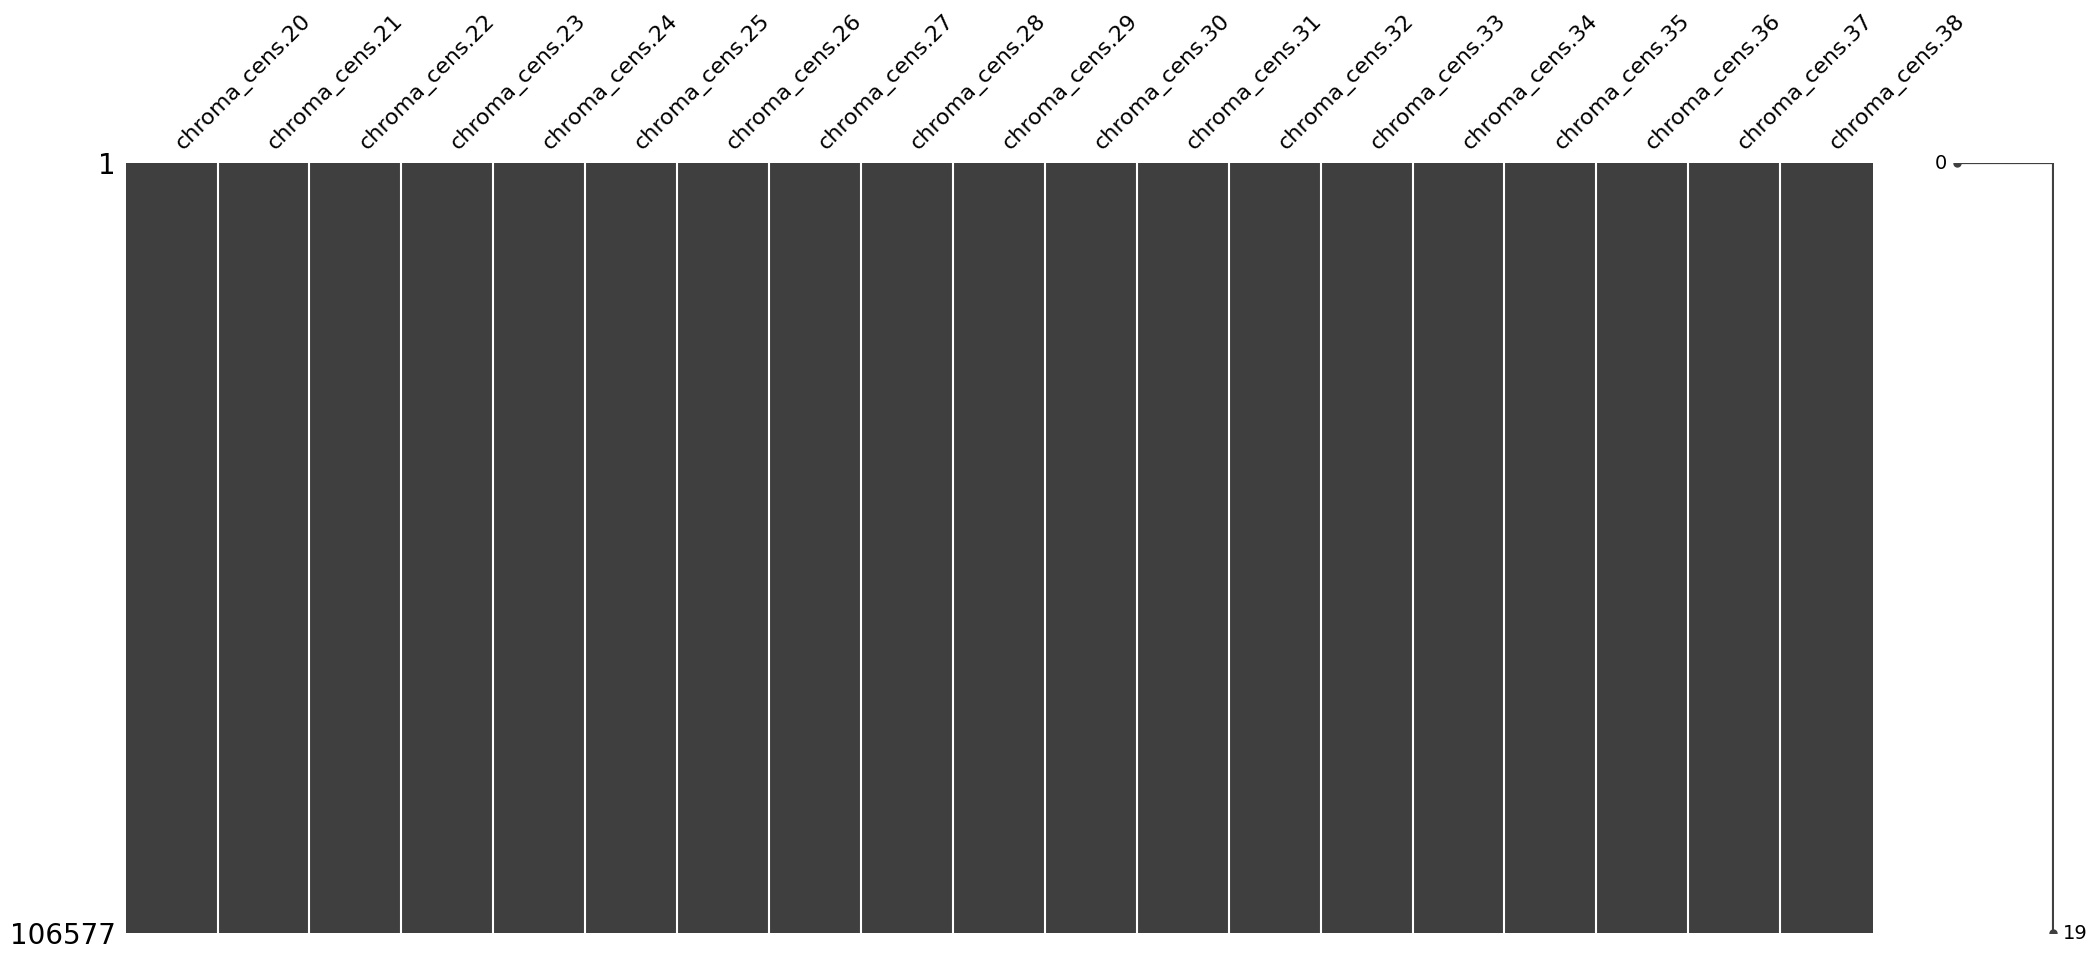

In [36]:
ms.matrix(features.iloc[:, 21:40])

#### Feature Engineering

In [37]:
features.iloc[0,0] = features.iloc[2, 0]

In [38]:
features.head(3)

feature chroma_cens chroma_cens.1 chroma_cens.2 chroma_cens.3  \
0  track_id    kurtosis      kurtosis      kurtosis      kurtosis   
1    number          01            02            03            04   
2  track_id         NaN           NaN           NaN           NaN   

  chroma_cens.4 chroma_cens.5 chroma_cens.6 chroma_cens.7 chroma_cens.8  \
0      kurtosis      kurtosis      kurtosis      kurtosis      kurtosis   
1            05            06            07            08            09   
2           NaN           NaN           NaN           NaN           NaN   

  chroma_cens.9 chroma_cens.10 chroma_cens.11 chroma_cens.12 chroma_cens.13  \
0      kurtosis       kurtosis       kurtosis            max            max   
1            10             11             12             01             02   
2           NaN            NaN            NaN            NaN            NaN   

  chroma_cens.14 chroma_cens.15 chroma_cens.16 chroma_cens.17 chroma_cens.18  \
0            max            max            max            max            max   
1             03             04             05             06             07   
2            NaN            NaN            NaN            NaN            NaN   

  chroma_cens.19 chroma_cens.20 chroma_cens.21 chroma_cens.22 chroma_cens.23  \
0            max            max            max            max            max   
1             08             09             10             11             12   
2            NaN            NaN            NaN            NaN            NaN   

  chroma_cens.24 chroma_cens.25 chroma_cens.26 chroma_cens.27 chroma_cens.28  \
0           mean           mean           mean           mean           mean   
1             01             02             03             04             05   
2            NaN            NaN            NaN            NaN            NaN   

  chroma_cens.29 chroma_cens.30 chroma_cens.31 chroma_cens.32 chroma_cens.33  \
0           mean           mean           mean           mean           mean   
1             06             07             08             09             10   
2            NaN            NaN            NaN            NaN            NaN   

  chroma_cens.34 chroma_cens.35 chroma_cens.36 chroma_cens.37 chroma_cens.38  \
0           mean           mean         median         median         median   
1             11             12             01             02             03   
2            NaN            NaN            NaN            NaN            NaN   

  chroma_cens.39 chroma_cens.40 chroma_cens.41 chroma_cens.42 chroma_cens.43  \
0         median         median         median         median         median   
1             04             05             06             07             08   
2            NaN            NaN            NaN            NaN            NaN   

  chroma_cens.44 chroma_cens.45 chroma_cens.46 chroma_cens.47 chroma_cens.48  \
0         median         median         median         median            min   
1             09             10             11             12             01   
2            NaN            NaN            NaN            NaN            NaN   

  chroma_cens.49 chroma_cens.50 chroma_cens.51 chroma_cens.52 chroma_cens.53  \
0            min            min            min            min            min   
1             02             03             04             05             06   
2            NaN            NaN            NaN            NaN            NaN   

  chroma_cens.54 chroma_cens.55 chroma_cens.56 chroma_cens.57 chroma_cens.58  \
0            min            min            min            min            min   
1             07             08             09             10             11   
2            NaN            NaN            NaN            NaN            NaN   

  chroma_cens.59 chroma_cens.60 chroma_cens.61 chroma_cens.62 chroma_cens.63  \
0            min           skew           skew           skew           skew   
1             12             01             02             0

In [39]:
features.drop(2, inplace=True)

In [40]:
len(features.columns)

519

In [41]:
len(features.iloc[0])

519

In [42]:
def combine_two_rows(df):
    columns = list(df.columns)
    for i in range(0, 519):
        columns[i] = columns[i] + " " + df.iloc[0, i]
    return columns

In [43]:
features.columns = combine_two_rows(features)

In [44]:
features.drop([0, 1], inplace=True)

In [45]:
features.reset_index(inplace=True)

In [46]:
features.drop('index', axis=1, inplace=True)

In [47]:
features.head()

feature track_id chroma_cens kurtosis chroma_cens.1 kurtosis  \
0                2     7.1806526184e+00       5.2303090096e+00   
1                3     1.8889633417e+00       7.6053929329e-01   
2                5     5.2756297588e-01      -7.7654317021e-02   
3               10     3.7022454739e+00      -2.9119303823e-01   
4               20    -1.9383698702e-01      -1.9852678478e-01   

  chroma_cens.2 kurtosis chroma_cens.3 kurtosis chroma_cens.4 kurtosis  \
0       2.4932080507e-01       1.3476201296e+00       1.4824777842e+00   
1       3.4529656172e-01       2.2952005863e+00       1.6540306807e+00   
2      -2.7961030602e-01       6.8588310480e-01       1.9375696182e+00   
3       2.1967420578e+00      -2.3444947600e-01       1.3673638105e+00   
4       2.0154602826e-01       2.5855624676e-01       7.7520370483e-01   

  chroma_cens.5 kurtosis chroma_cens.6 kurtosis chroma_cens.7 kurtosis  \
0       5.3137123585e-01       1.4815930128e+00       2.6914546490e+00   
1       6.7592434585e-02       1.3668476343e+00       1.0540937185e+00   
2       8.8083887100e-01      -9.2319184542e-01      -9.2723226547e-01   
3       9.9841135740e-01       1.7706941366e+00       1.6045658588e+00   
4       8.4794059396e-02      -2.8929358721e-01      -8.1641042233e-01   

  chroma_cens.8 kurtosis chroma_cens.9 kurtosis chroma_cens.10 kurtosis  \
0       8.6686819792e-01       1.3412306309e+00        1.3477915525e+00   
1       1.0810308903e-01       6.1918509007e-01        1.0382531881e+00   
2       6.6661673784e-01       1.0385463238e+00        2.6893171668e-01   
3       5.2121698856e-01       1.9823863506e+00        4.3268237114e+00   
4       4.3850939721e-02      -8.0476069450e-01       -9.9095779657e-01   

  chroma_cens.11 kurtosis chroma_cens.12 max chroma_cens.13 max  \
0        1.2376583815e+00   6.9249993563e-01   5.6934404373e-01   
1        1.2922351360e+00   6.7764127254e-01   5.8424842358e-01   
2        1.1251406670e+00   6.1101400852e-01   6.5147054195e-01   
3        1.3004057407e+00   4.6184015274e-01   5.4041141272e-01   
4       -4.3038117886e-01   6.5286397934e-01   6.7628991604e-01   

  chroma_cens.14 max chroma_cens.15 max chroma_cens.16 max chroma_cens.17 max  \
0   5.9704089165e-01   6.2586373091e-01   5.6732958555e-01   4.4394925237e-01   
1   5.8127075434e-01   5.8118158579e-01   4.5424115658e-01   4.6484073997e-01   
2   4.9452754855e-01   4.4879883528e-01   4.6862444282e-01   4.5402124524e-01   
3   4.4670808315e-01   6.4755302668e-01   5.9190773964e-01   5.1330602169e-01   
4   6.7028784752e-01   5.9866631031e-01   6.5360695124e-01   6.9764536619e-01   

  chroma_cens.18 max chroma_cens.19 max chroma_cens.20 max chroma_cens.21 max  \
0   4.8797628284e-01   4.9732723832e-01   5.7443547249e-01   5.7924067974e-01   
1   5.4283261299e-01   6.6471982002e-01   5.1132947206e-01   5.3099834919e-01   
2   4.9717202783e-01   5.5975544453e-01   6.7128735781e-01   6.1056482792e-01   
3   6.5150094032e-01   5.1688706875e-01   5.1147907972e-01   4.7826284170e-01   
4   6.6492879391e-01   6.8656331301e-01   6.3511699438e-01   6.6739308834e-01   

  chroma_cens.22 max chroma_cens.23 max chroma_cens.24 mean  \
0   6.2010246515e-01   5.8694541454e-01    4.7430026531e-01   
1   6.0339796543e-01   5.4742807150e-01    2.3278446496e-01   
2   5.5166327953e-01   6.0341262817e-01    2.5841978192e-01   
3   6.3876610994e-01   6.3849490881e-01    2.2988221049e-01   
4   6.8958860636e-01   6.8319565058e-01    2.0280598104e-01   

  chroma_cens.25 mean chroma_cens.26 mean chroma_cens.27 mean  \
0    3.6981594563e-01    2.3611885309e-01    2.2806788981e-01   
1    2.2946873307e-01    2.2567413747e-01    2.1671250463e-01   
2    3.0338549614e-01    2.5073742867e-01    2.1856224537e-01   
3    2.8697809577e-01    2.4009644985e-01    2.2679224610e-01   
4    2.4512499571e-01    2.6299744844e-01    1.8796080351e-01   

  chroma_cens.28 mean chroma_cens.29 mean chroma_cens.30 mean  \
0    2.2282999754e-01    2.2141483426e-01    2.29238

In [48]:
features = features.astype(dtype='float')
features['feature track_id'] = features['feature track_id'].astype('int')

<Axes: >

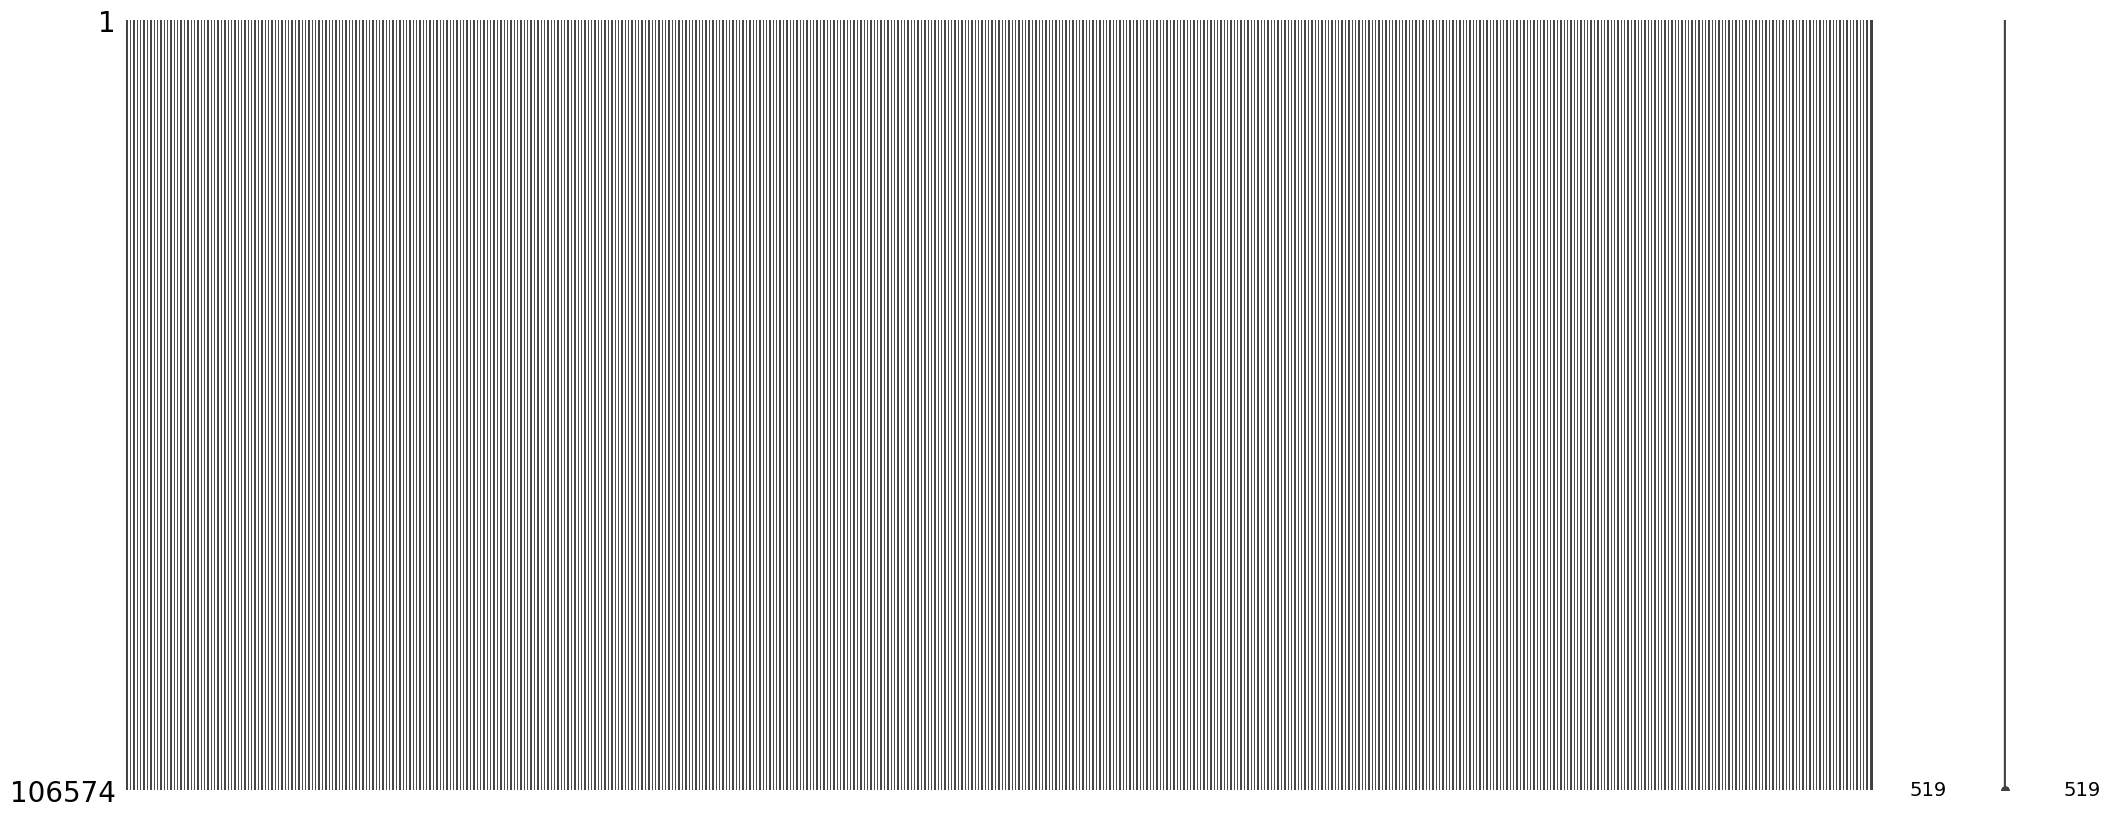

In [49]:
ms.matrix(features)

In [50]:
features.head(3)

feature track_id  chroma_cens kurtosis  chroma_cens.1 kurtosis  \
0                 2              7.180653                5.230309   
1                 3              1.888963                0.760539   
2                 5              0.527563               -0.077654   

   chroma_cens.2 kurtosis  chroma_cens.3 kurtosis  chroma_cens.4 kurtosis  \
0                0.249321                1.347620                1.482478   
1                0.345297                2.295201                1.654031   
2               -0.279610                0.685883                1.937570   

   chroma_cens.5 kurtosis  chroma_cens.6 kurtosis  chroma_cens.7 kurtosis  \
0                0.531371                1.481593                2.691455   
1                0.067592                1.366848                1.054094   
2                0.880839               -0.923192               -0.927232   

   chroma_cens.8 kurtosis  chroma_cens.9 kurtosis  chroma_cens.10 kurtosis  \
0                0.866868                1.341231                 1.347792   
1                0.108103                0.619185                 1.038253   
2                0.666617                1.038546                 0.268932   

   chroma_cens.11 kurtosis  chroma_cens.12 max  chroma_cens.13 max  \
0                 1.237658            0.692500            0.569344   
1                 1.292235            0.677641            0.584248   
2                 1.125141            0.611014            0.651471   

   chroma_cens.14 max  chroma_cens.15 max  chroma_cens.16 max  \
0            0.597041            0.625864            0.567330   
1            0.581271            0.581182            0.454241   
2            0.494528            0.448799            0.468624   

   chroma_cens.17 max  chroma_cens.18 max  chroma_cens.19 max  \
0            0.443949            0.487976            0.497327   
1            0.464841            0.542833            0.664720   
2            0.454021            0.497172            0.559755   

   chroma_cens.20 max  chroma_cens.21 max  chroma_cens.22 max  \
0            0.574435            0.579241            0.620102   
1            0.511329            0.530998            0.603398   
2            0.671287            0.610565            0.551663   

   chroma_cens.23 max  chroma_cens.24 mean  chroma_cens.25 mean  \
0            0.586945             0.474300             0.369816   
1            0.547428             0.232784             0.229469   
2            0.603413             0.258420             0.303385   

   chroma_cens.26 mean  chroma_cens.27 mean  chroma_cens.28 mean  \
0             0.236119             0.228068             0.222830   
1             0.225674             0.216713             0.220512   
2             0.250737             0.218562             0.245743   

   chroma_cens.29 mean  chroma_cens.30 mean  chroma_cens.31 mean  \
0             0.221415             0.229238             0.248795   
1             0.242744             0.369235             0.420716   
2             0.236018             0.275766             0.293982   

   chroma_cens.32 mean  chroma_cens.33 mean  chroma_cens.34 mean  \
0             0.196245             0.175809             0.200713   
1             0.312129             0.242748             0.264292   
2             0.346324             0.289821             0.246368   

   chroma_cens.35 mean  chroma_cens.36 median  chroma_cens.37 median  \
0             0.319972               0.482825               0.387652   
1             0.225683               0.230579               0.228059   
2             0.220939               0.255472               0.293571   

   chroma_cens.38 median  chroma_cens.39 median  chroma_cens.40 median  \
0               0.249082               0.238187               0.233066   
1               0.209370               0.202267               0.230913   
2               0.245253               0.222065               0.247063   

   chroma_cens.41 median  chroma_cens.42 median  chroma_c

### Working with 'Tracks' dataset

#### Analysing Data

In [51]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106576 entries, 0 to 106575
Data columns (total 53 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  106575 non-null  object
 1   album       106575 non-null  object
 2   album.1     103046 non-null  object
 3   album.2     70295 non-null   object
 4   album.3     15296 non-null   object
 5   album.4     106575 non-null  object
 6   album.5     106575 non-null  object
 7   album.6     83150 non-null   object
 8   album.7     106575 non-null  object
 9   album.8     18061 non-null   object
 10  album.9     106575 non-null  object
 11  album.10    105550 non-null  object
 12  album.11    106575 non-null  object
 13  album.12    100067 non-null  object
 14  artist      22712 non-null   object
 15  artist.1    5376 non-null    object
 16  artist.2    14272 non-null   object
 17  artist.3    71157 non-null   object
 18  artist.4    106575 non-null  object
 19  artist.5    105719 non-

In [52]:
tracks.head()

Unnamed: 0     album              album.1              album.2   album.3  \
0        NaN  comments         date_created        date_released  engineer   
1   track_id       NaN                  NaN                  NaN       NaN   
2          2         0  2008-11-26 01:44:45  2009-01-05 00:00:00       NaN   
3          3         0  2008-11-26 01:44:45  2009-01-05 00:00:00       NaN   
4          5         0  2008-11-26 01:44:45  2009-01-05 00:00:00       NaN   

     album.4 album.5      album.6  album.7   album.8 album.9  \
0  favorites      id  information  listens  producer    tags   
1        NaN     NaN          NaN      NaN       NaN     NaN   
2          4       1      <p></p>     6073       NaN      []   
3          4       1      <p></p>     6073       NaN      []   
4          4       1      <p></p>     6073       NaN      []   

               album.10 album.11 album.12               artist  \
0                 title   tracks     type    active_year_begin   
1                   NaN      NaN      NaN                  NaN   
2  AWOL - A Way Of Life        7    Album  2006-01-01 00:00:00   
3  AWOL - A Way Of Life        7    Album  2006-01-01 00:00:00   
4  AWOL - A Way Of Life        7    Album  2006-01-01 00:00:00   

          artist.1           artist.2  \
0  active_year_end  associated_labels   
1              NaN                NaN   
2              NaN                NaN   
3              NaN                NaN   
4              NaN                NaN   

                                            artist.3  artist.4  \
0                                                bio  comments   
1                                                NaN       NaN   
2  <p>A Way Of Life, A Collective of Hip-Hop from...         0   
3  <p>A Way Of Life, A Collective of Hip-Hop from...         0   
4  <p>A Way Of Life, A Collective of Hip-Hop from...         0   

              artist.5   artist.6 artist.7    artist.8    artist.9  \
0         date_created  favorites       id    latitude    location   
1                  NaN        NaN      NaN         NaN         NaN   
2  2008-11-26 01:42:32          9        1  40.0583238  New Jersey   
3  2008-11-26 01:42:32          9        1  40.0583238  New Jersey   
4  2008-11-26 01:42:32          9        1  40.0583238  New Jersey   

     artist.10                                          artist.11 artist.12  \
0    longitude                                            members      name   
1          NaN                                                NaN       NaN   
2  -74.4056612  Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...      AWOL   
3  -74.4056612  Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...      AWOL   
4  -74.4056612  Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...      AWOL   

                                           artist.13 artist.14  \
0                                   related_projects      tags   
1                                                NaN       NaN   
2  The list of past projects is 2 long but every1...  ['awol']   
3  The list of past projects is 2 long but every1...  ['awol']   
4  The list of past projects is 2 long but every1...  ['awol']   

                                 artist.15       artist.16       set   set.1  \
0                                  website  wikipedia_page     split  subset   
1                                      NaN             NaN       NaN     NaN   
2  http://www.AzillionRecords.blogspot.com             NaN  training   small   
3  http://www.AzillionRecords.blogspot.com             NaN  training  medium   
4  http://www.AzillionRecords.blogspot.com             NaN  training   small   

      track   track.1   track.2              track.3              track.4  \
0  bit_rate  comments  composer         date_created        date_recorded   
1       NaN       NaN       NaN                  NaN                  NaN   
2    256000         0       NaN  2008-11-26 01:48:12  2008-11-26 00:00:00   
3    256000         0    

In [53]:
tracks.iloc[0,0] = tracks.iloc[1, 0]

In [54]:
tracks.drop(1, axis=0, inplace=True)

In [55]:
tracks.head()

Unnamed: 0     album              album.1              album.2   album.3  \
0   track_id  comments         date_created        date_released  engineer   
2          2         0  2008-11-26 01:44:45  2009-01-05 00:00:00       NaN   
3          3         0  2008-11-26 01:44:45  2009-01-05 00:00:00       NaN   
4          5         0  2008-11-26 01:44:45  2009-01-05 00:00:00       NaN   
5         10         0  2008-11-26 01:45:08  2008-02-06 00:00:00       NaN   

     album.4 album.5      album.6  album.7   album.8 album.9  \
0  favorites      id  information  listens  producer    tags   
2          4       1      <p></p>     6073       NaN      []   
3          4       1      <p></p>     6073       NaN      []   
4          4       1      <p></p>     6073       NaN      []   
5          4       6          NaN    47632       NaN      []   

               album.10 album.11 album.12               artist  \
0                 title   tracks     type    active_year_begin   
2  AWOL - A Way Of Life        7    Album  2006-01-01 00:00:00   
3  AWOL - A Way Of Life        7    Album  2006-01-01 00:00:00   
4  AWOL - A Way Of Life        7    Album  2006-01-01 00:00:00   
5     Constant Hitmaker        2    Album                  NaN   

          artist.1                                           artist.2  \
0  active_year_end                                  associated_labels   
2              NaN                                                NaN   
3              NaN                                                NaN   
4              NaN                                                NaN   
5              NaN  Mexican Summer, Richie Records, Woodsist, Skul...   

                                            artist.3  artist.4  \
0                                                bio  comments   
2  <p>A Way Of Life, A Collective of Hip-Hop from...         0   
3  <p>A Way Of Life, A Collective of Hip-Hop from...         0   
4  <p>A Way Of Life, A Collective of Hip-Hop from...         0   
5  <p><span style="font-family:Verdana, Geneva, A...         3   

              artist.5   artist.6 artist.7    artist.8    artist.9  \
0         date_created  favorites       id    latitude    location   
2  2008-11-26 01:42:32          9        1  40.0583238  New Jersey   
3  2008-11-26 01:42:32          9        1  40.0583238  New Jersey   
4  2008-11-26 01:42:32          9        1  40.0583238  New Jersey   
5  2008-11-26 01:42:55         74        6         NaN         NaN   

     artist.10                                          artist.11  artist.12  \
0    longitude                                            members       name   
2  -74.4056612  Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...       AWOL   
3  -74.4056612  Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...       AWOL   
4  -74.4056612  Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...       AWOL   
5          NaN                           Kurt Vile, the Violators  Kurt Vile   

                                           artist.13                artist.14  \
0                                   related_projects                     tags   
2  The list of past projects is 2 long but every1...                 ['awol']   
3  The list of past projects is 2 long but every1...                 ['awol']   
4  The list of past projects is 2 long but every1...                 ['awol']   
5                                                NaN  ['philly', 'kurt vile']   

                                 artist.15       artist.16       set   set.1  \
0                                  website  wikipedia_page     split  subset   
2  http://www.AzillionRecords.blogspot.com             NaN  training   small   
3  http://www.AzillionRecords.blogspot.com             NaN  training  medium   
4  http://www.AzillionRecords.blogspot.com             NaN  training   small   
5                      http://kurtvile.com             NaN  training   small   

      track   track.1    track.2             

#### Feature Engineering

In [56]:
len(tracks.columns)

53

In [57]:
def combine_one_row(df):
    columns = list(df.columns)
    for i in range(0, 53):
        if i == 0:
            columns[i] = df.iloc[0, i]
        else:
            columns[i] = columns[i] + " " + df.iloc[0, i]
    return columns

In [58]:
tracks.columns = combine_one_row(tracks)

In [59]:
tracks.drop(0, inplace=True)

In [60]:
tracks.reset_index(inplace=True)

In [61]:
tracks.drop(['index'], axis=1, inplace=True)

<Axes: >

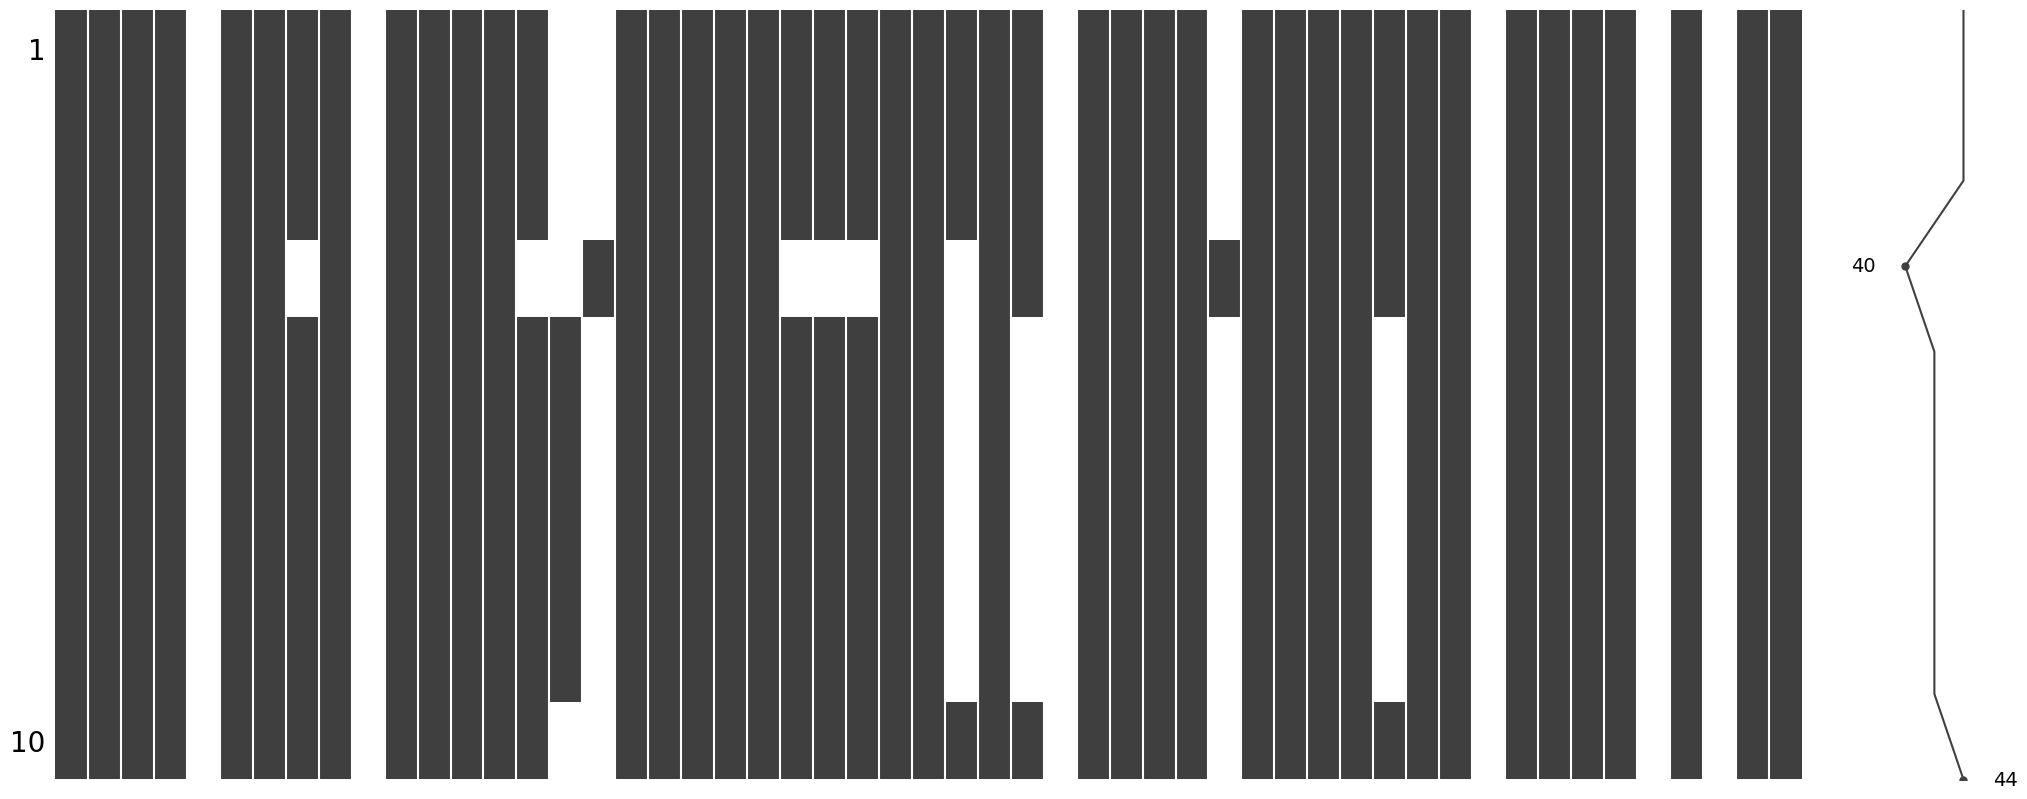

In [62]:
ms.matrix(tracks.iloc[0: 10])

In [63]:
tracks.head()

track_id album comments album.1 date_created album.2 date_released  \
0        2              0  2008-11-26 01:44:45   2009-01-05 00:00:00   
1        3              0  2008-11-26 01:44:45   2009-01-05 00:00:00   
2        5              0  2008-11-26 01:44:45   2009-01-05 00:00:00   
3       10              0  2008-11-26 01:45:08   2008-02-06 00:00:00   
4       20              0  2008-11-26 01:45:05   2009-01-06 00:00:00   

  album.3 engineer album.4 favorites album.5 id  \
0              NaN                 4          1   
1              NaN                 4          1   
2              NaN                 4          1   
3              NaN                 4          6   
4              NaN                 2          4   

                         album.6 information album.7 listens album.8 producer  \
0                                    <p></p>            6073              NaN   
1                                    <p></p>            6073              NaN   
2                                    <p></p>            6073              NaN   
3                                        NaN           47632              NaN   
4  <p> "spiritual songs" from Nicky Cook</p>            2710              NaN   

  album.9 tags        album.10 title album.11 tracks album.12 type  \
0           []  AWOL - A Way Of Life               7         Album   
1           []  AWOL - A Way Of Life               7         Album   
2           []  AWOL - A Way Of Life               7         Album   
3           []     Constant Hitmaker               2         Album   
4           []                 Niris              13         Album   

  artist active_year_begin artist.1 active_year_end  \
0      2006-01-01 00:00:00                      NaN   
1      2006-01-01 00:00:00                      NaN   
2      2006-01-01 00:00:00                      NaN   
3                      NaN                      NaN   
4      1990-01-01 00:00:00      2011-01-01 00:00:00   

                          artist.2 associated_labels  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3  Mexican Summer, Richie Records, Woodsist, Skul...   
4                                                NaN   

                                        artist.3 bio artist.4 comments  \
0  <p>A Way Of Life, A Collective of Hip-Hop from...                 0   
1  <p>A Way Of Life, A Collective of Hip-Hop from...                 0   
2  <p>A Way Of Life, A Collective of Hip-Hop from...                 0   
3  <p><span style="font-family:Verdana, Geneva, A...                 3   
4  <p>Songs written by: Nicky Cook</p>\n<p>VOCALS...                 2   

  artist.5 date_created artist.6 favorites artist.7 id artist.8 latitude  \
0   2008-11-26 01:42:32                  9           1        40.0583238   
1   2008-11-26 01:42:32                  9           1        40.0583238   
2   2008-11-26 01:42:32                  9           1        40.0583238   
3   2008-11-26 01:42:55                 74           6               NaN   
4   2008-11-26 01:42:52                 10           4         51.895927   

    artist.9 location artist.10 longitude  \
0          New Jersey         -74.4056612   
1          New Jersey         -74.4056612   
2          New Jersey         -74.4056612   
3                 NaN                 NaN   
4  Colchester England            0.891874   

                                   artist.11 members artist.12 name  \
0  Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...           AWOL   
1  Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...           AWOL   
2  Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...           AWOL   
3                           Kurt Vile, the Violators      Kurt Vile   
4                                       Nicky Cook\n     Nicky Cook   

                          artist.13 related_projects  \
0  The list of past projects i

In [64]:
tracks['track.7 genre_top'].value_counts()

track.7 genre_top
Rock                   14182
Experimental           10608
Electronic              9372
Hip-Hop                 3552
Folk                    2803
Pop                     2332
Instrumental            2079
International           1389
Classical               1230
Jazz                     571
Old-Time / Historic      554
Spoken                   423
Country                  194
Soul-RnB                 175
Blues                    110
Easy Listening            24
Name: count, dtype: int64

In [65]:
track_title = pd.DataFrame(tracks['track.19 title'])

In [66]:
track_title['track_id'] = tracks['track_id']

In [67]:
track_title.head()

track.19 title track_id
0             Food        2
1     Electric Ave        3
2       This World        5
3          Freeway       10
4  Spiritual Level       20

In [68]:
track_title.tail()

track.19 title track_id
106569                                  The Auger   155316
106570                            Let's Skin Ruby   155317
106571         My House Smells Like Kim Deal/Pulp   155318
106572                    The Man With Two Mouths   155319
106573  Another Trick Up My Sleeve (Instrumental)   155320

In [69]:
track_title.shape

(106574, 2)

In [70]:
tracks.drop(['album comments','album.1 date_created', 
             'album.2 date_released', 'album.11 tracks', 
             'album.9 tags', 'album.8 producer', 'album.3 engineer', 'album.6 information',
             'artist active_year_begin', 'artist.1 active_year_end', 'artist.2 associated_labels',
             'artist.3 bio','artist.4 comments','artist.5 date_created', 'artist.7 id',
             'artist.8 latitude','artist.9 location','artist.10 longitude', 'artist.11 members',
             'artist.13 related_projects', 'artist.14 tags','artist.15 website','artist.16 wikipedia_page',
             'set.1 subset', 'track.1 comments', 'track.2 composer', 'track.3 date_created', 'track.4 date_recorded',
             'track.10 information', 'track.13 license', 'track.15 lyricist', 'track.17 publisher', 'track.18 tags',
             'track.19 title'], axis=1, inplace=True)

In [71]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106574 entries, 0 to 106573
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   track_id                106574 non-null  object
 1   album.4 favorites       106574 non-null  object
 2   album.5 id              106574 non-null  object
 3   album.7 listens         106574 non-null  object
 4   album.10 title          105549 non-null  object
 5   album.12 type           100066 non-null  object
 6   artist.6 favorites      106574 non-null  object
 7   artist.12 name          106574 non-null  object
 8   set split               106574 non-null  object
 9   track bit_rate          106574 non-null  object
 10  track.5 duration        106574 non-null  object
 11  track.6 favorites       106574 non-null  object
 12  track.7 genre_top       49598 non-null   object
 13  track.8 genres          106574 non-null  object
 14  track.9 genres_all      106574 non-n

<Axes: >

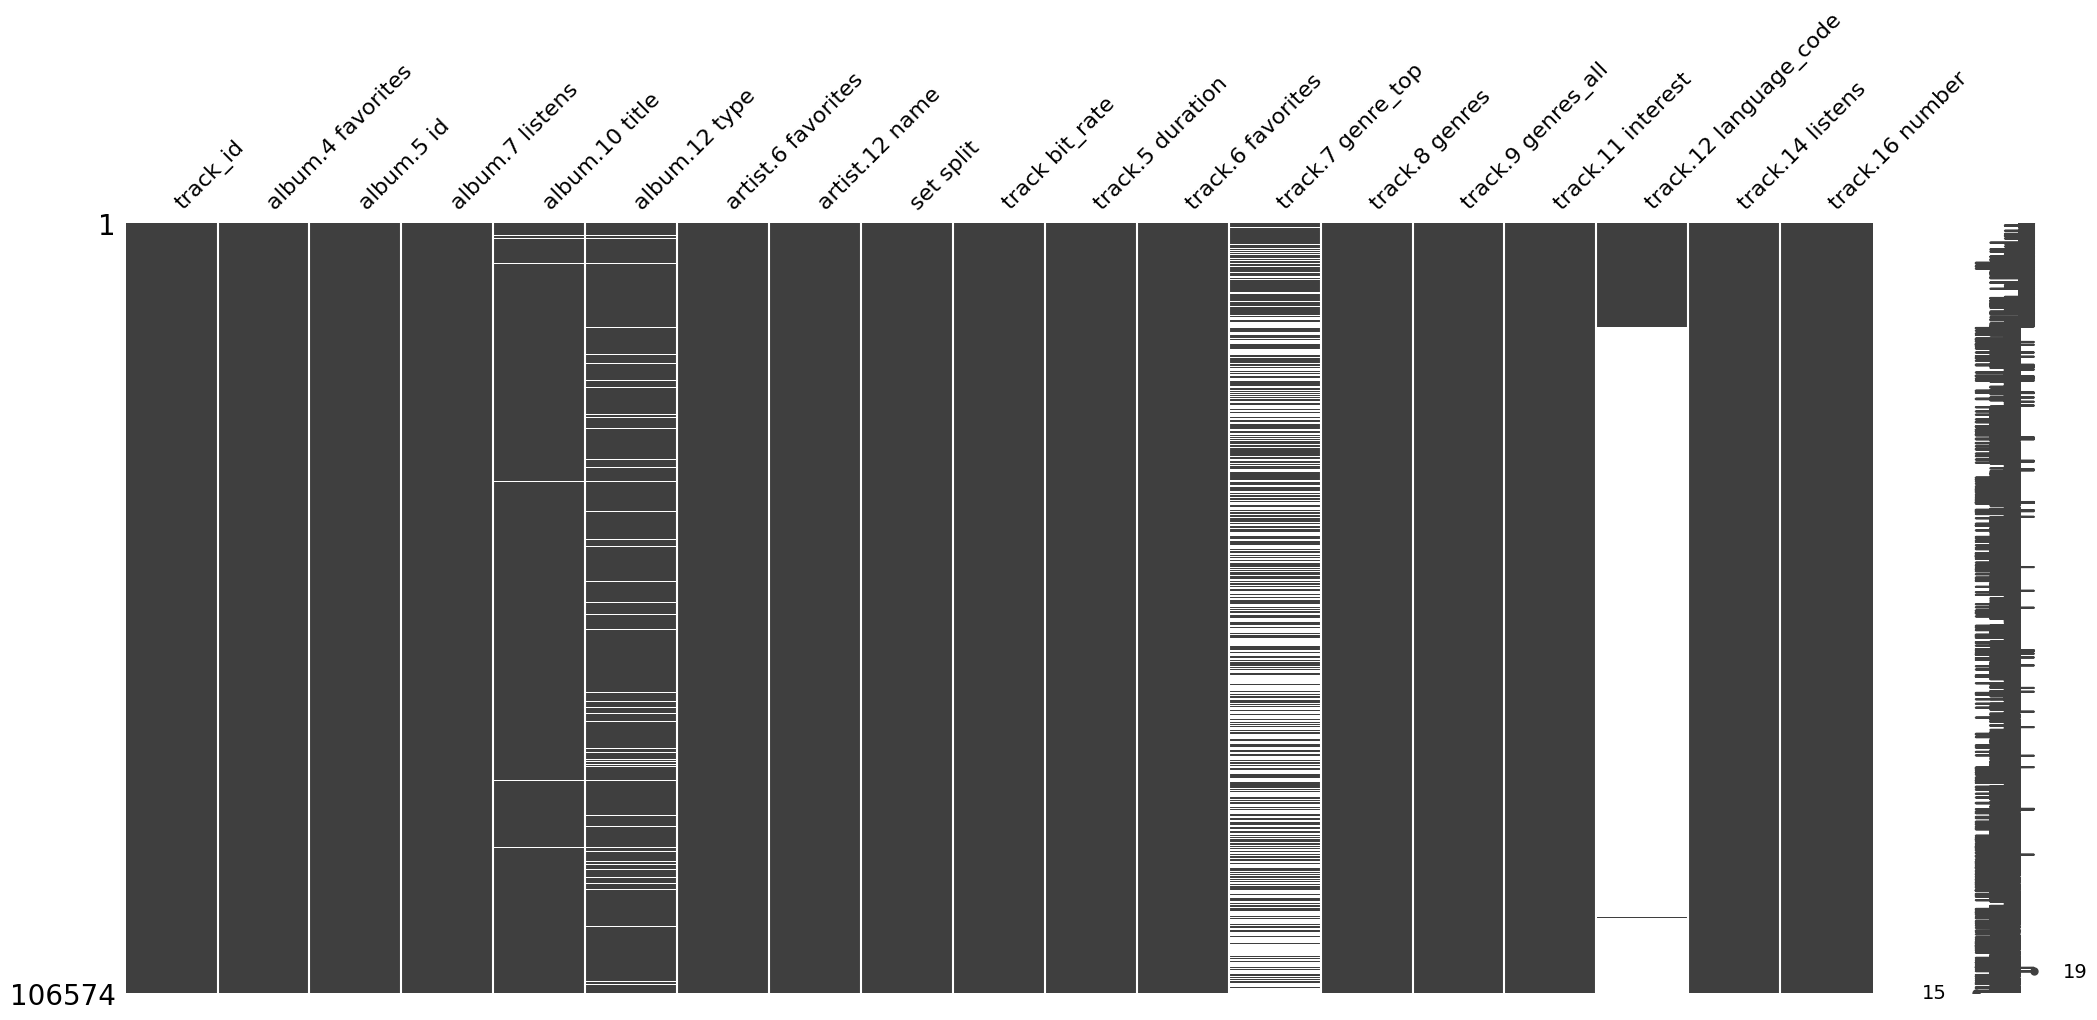

In [72]:
ms.matrix(tracks)

In [73]:
tracks['album.12 type'].value_counts()

album.12 type
Album               87549
Radio Program        6551
Live Performance     5035
Single Tracks         917
Contest                14
Name: count, dtype: int64

In [74]:
tracks['album.10 title'].value_counts()

album.10 title
microSong Entries                                              310
Sectioned v4.0                                                 200
Live at the 2014 Golden Festival                               168
INTO INFINITY: an exploration of on and on and on and on...    151
Necktar Volume 6                                               150
                                                              ... 
The Knight of Jaffa                                              1
The Dimensions of Time                                           1
The Death of Time                                                1
The Watcher, pt. 2                                               1
Bad Panda #03                                                    1
Name: count, Length: 14298, dtype: int64

In [75]:
tracks['album.10 title'].fillna(method='ffill', inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_1668\3038136168.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tracks['album.10 title'].fillna(method='ffill', inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_1668\3038136168.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  tracks['album.10 title'].fillna(method='ffill', inplace=True)


In [76]:
tracks.drop(['track.12 language_code', 'album.12 type'], axis=1, inplace=True)

In [77]:
tracks.drop('track.9 genres_all', axis=1, inplace=True)

<Axes: >

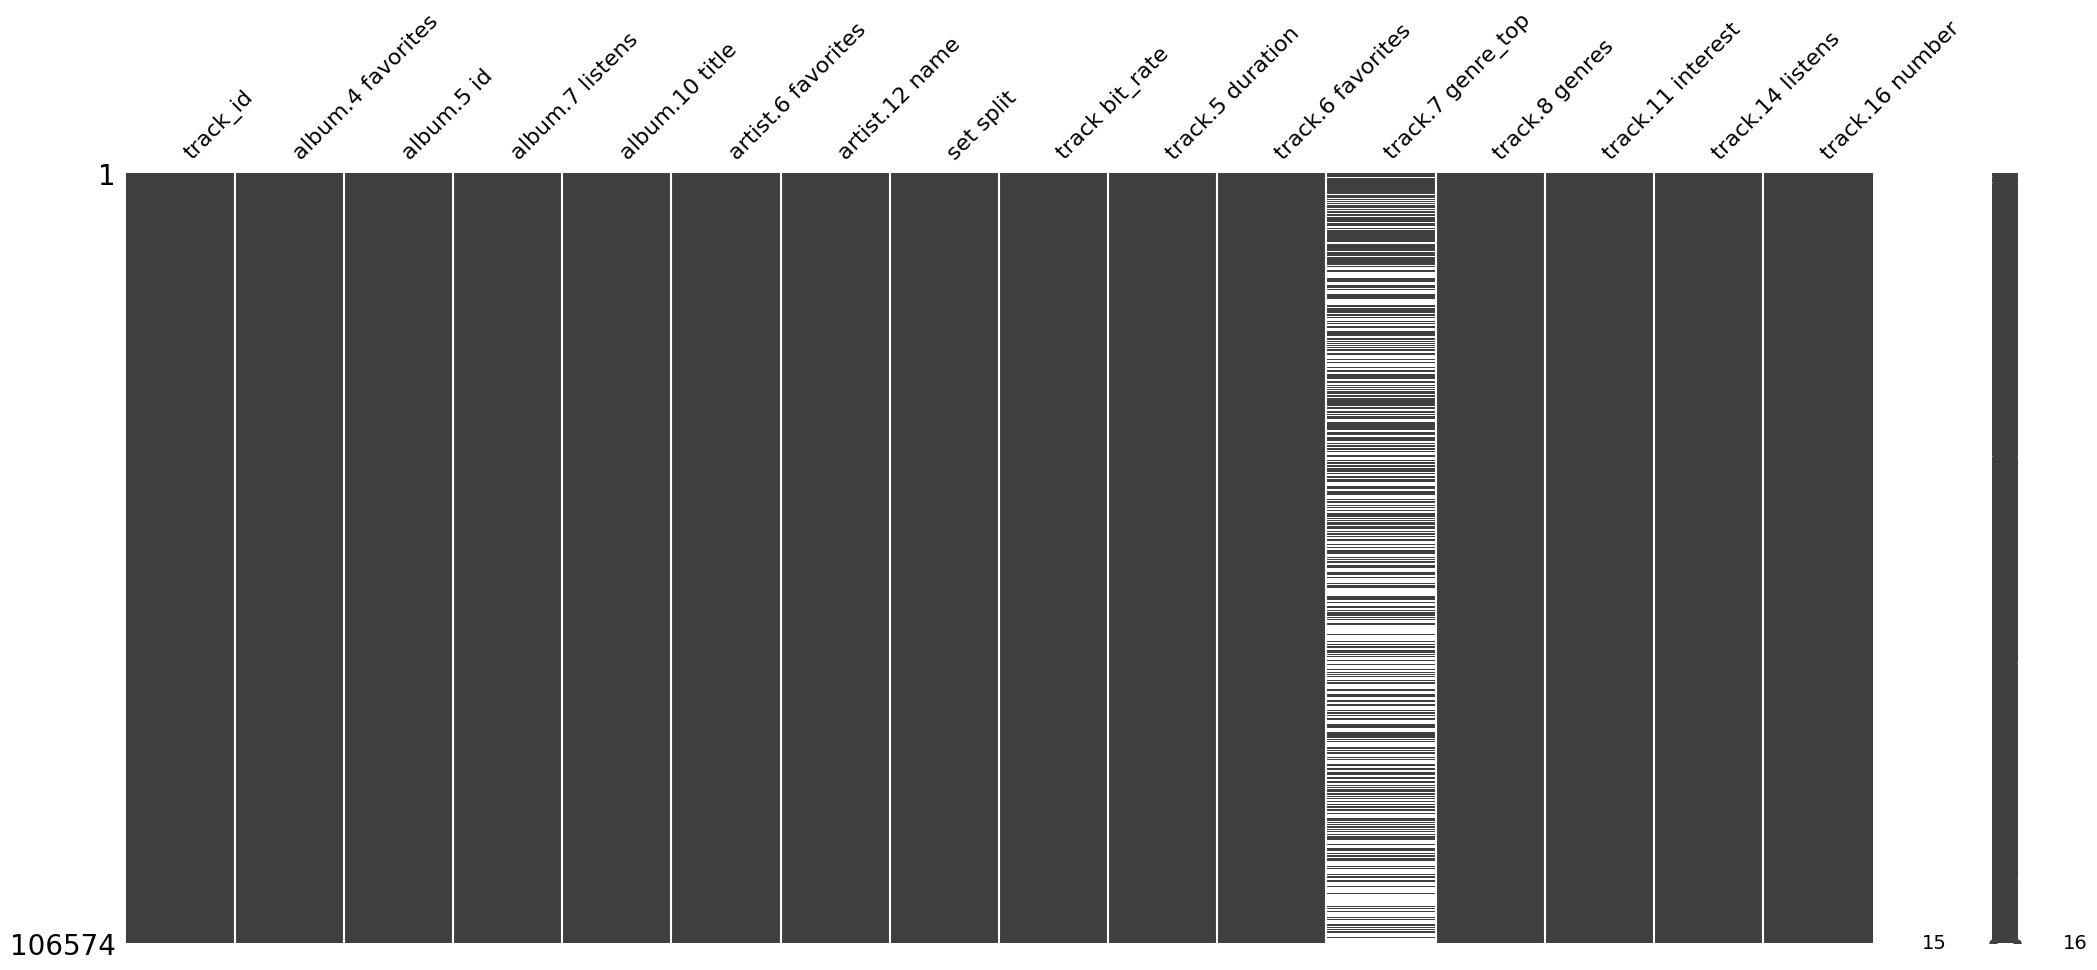

In [78]:
ms.matrix(tracks)

In [79]:
tracks['track.8 genres'].unique()

array(['[21]', '[10]', '[76, 103]', ..., '[17, 63, 1235]',
       '[42, 107, 183]', '[10, 12, 169]'], dtype=object)

In [80]:
genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   genre_id   163 non-null    int64 
 1   #tracks    163 non-null    int64 
 2   parent     163 non-null    int64 
 3   title      163 non-null    object
 4   top_level  163 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 6.5+ KB


In [81]:
type(tracks['track.7 genre_top'].iloc[27])

str

In [82]:
def getList(cd):
    return cd[1:-1].split(',')

In [83]:
for i in range(0, 106574):
    if type(tracks['track.7 genre_top'][i]) == float:
        genre_list = getList(str(tracks['track.8 genres'][i]))
        count = len(genre_list)
        title = ""
        for j in range(0, count):
            title = title + str(genres['title'][j]) + str('|')
        tracks['track.7 genre_top'][i] = title

C:\Users\User\AppData\Local\Temp\ipykernel_1668\1734541745.py:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  tracks['track.7 genre_top'][i] = title


### Working with 'Genre' dataset

#### Analysing Data

In [84]:
genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   genre_id   163 non-null    int64 
 1   #tracks    163 non-null    int64 
 2   parent     163 non-null    int64 
 3   title      163 non-null    object
 4   top_level  163 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 6.5+ KB


<Axes: >

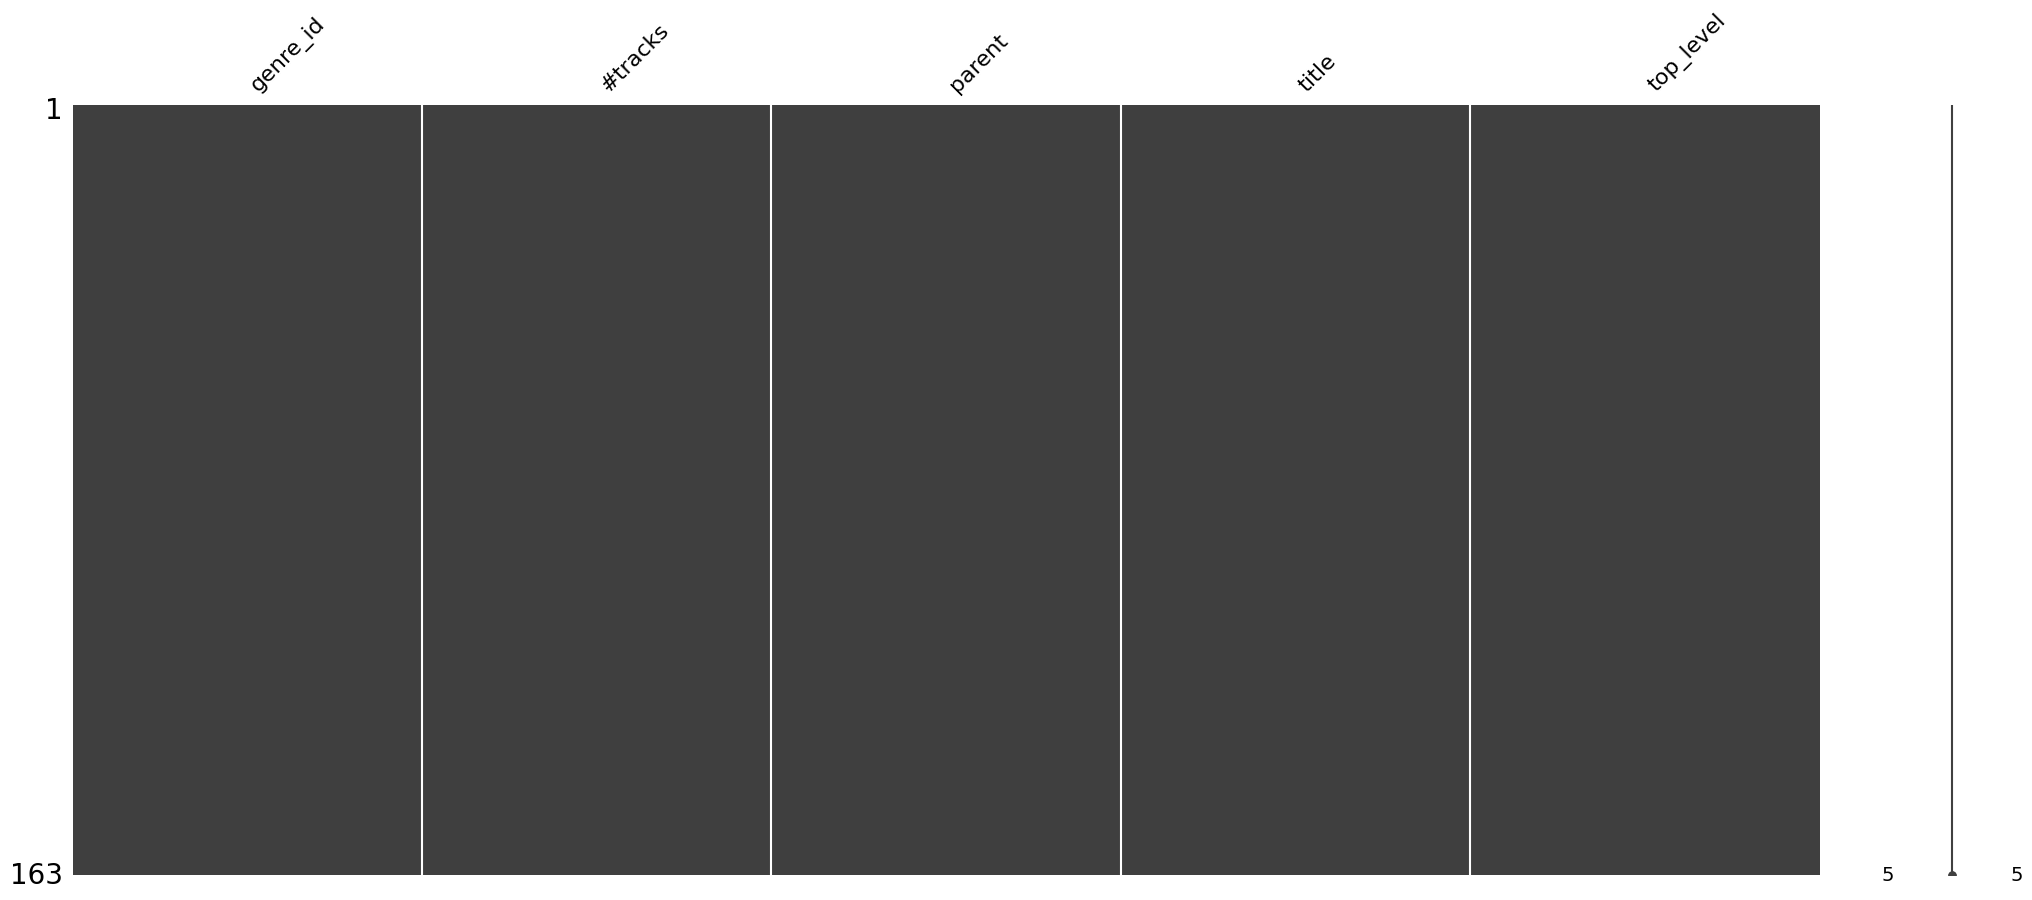

In [85]:
ms.matrix(genres)

In [86]:
genres.head()

genre_id  #tracks  parent          title  top_level
0         1     8693      38    Avant-Garde         38
1         2     5271       0  International          2
2         3     1752       0          Blues          3
3         4     4126       0           Jazz          4
4         5     4106       0      Classical          5

#### Feature Engineering

Nothing to engineer!

### Combining all datasets into a single entity

#### Analysing Data

In [87]:
echonest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13129 entries, 0 to 13128
Columns: 240 entries, track_id to 223
dtypes: float64(237), object(3)
memory usage: 24.0+ MB


In [88]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106574 entries, 0 to 106573
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   track_id            106574 non-null  object
 1   album.4 favorites   106574 non-null  object
 2   album.5 id          106574 non-null  object
 3   album.7 listens     106574 non-null  object
 4   album.10 title      106574 non-null  object
 5   artist.6 favorites  106574 non-null  object
 6   artist.12 name      106574 non-null  object
 7   set split           106574 non-null  object
 8   track bit_rate      106574 non-null  object
 9   track.5 duration    106574 non-null  object
 10  track.6 favorites   106574 non-null  object
 11  track.7 genre_top   106574 non-null  object
 12  track.8 genres      106574 non-null  object
 13  track.11 interest   106574 non-null  object
 14  track.14 listens    106574 non-null  object
 15  track.16 number     106574 non-null  object
dtypes:

In [89]:
tracks.head()

track_id album.4 favorites album.5 id album.7 listens        album.10 title  \
0        2                 4          1            6073  AWOL - A Way Of Life   
1        3                 4          1            6073  AWOL - A Way Of Life   
2        5                 4          1            6073  AWOL - A Way Of Life   
3       10                 4          6           47632     Constant Hitmaker   
4       20                 2          4            2710                 Niris   

  artist.6 favorites artist.12 name set split track bit_rate track.5 duration  \
0                  9           AWOL  training         256000              168   
1                  9           AWOL  training         256000              237   
2                  9           AWOL  training         256000              206   
3                 74      Kurt Vile  training         192000              161   
4                 10     Nicky Cook  training         256000              311   

  track.6 favorites           track.7 genre_top track.8 genres  \
0                 2                     Hip-Hop           [21]   
1                 1                     Hip-Hop           [21]   
2                 6                     Hip-Hop           [21]   
3               178                         Pop           [10]   
4                 0  Avant-Garde|International|      [76, 103]   

  track.11 interest track.14 listens track.16 number  
0              4656             1293               3  
1              1470              514               4  
2              1933             1151               6  
3             54881            50135               1  
4               978              361               3

In [90]:
echonest.head()

1 track_id  acousticness  danceability    energy  instrumentalness  liveness  \
0        2      0.416675      0.675894  0.634476          0.010628  0.177647   
1        3      0.374408      0.528643  0.817461          0.001851  0.105880   
2        5      0.043567      0.745566  0.701470          0.000697  0.373143   
3       10      0.951670      0.658179  0.924525          0.965427  0.115474   
4      134      0.452217      0.513238  0.560410          0.019443  0.096567   

1  speechiness    tempo   valence artist_name               release  \
0     0.159310  165.922  0.576661        AWOL  AWOL - A Way Of Life   
1     0.461818  126.957  0.269240        AWOL  AWOL - A Way Of Life   
2     0.124595  100.260  0.621661        AWOL  AWOL - A Way Of Life   
3     0.032985  111.562  0.963590   Kurt Vile     Constant Hitmaker   
4     0.525519  114.290  0.894072        AWOL  AWOL - A Way Of Life   

1  artist_discovery  artist_familiarity  artist_hotttnesss  song_currency  \
0          0.388990            0.386740           0.406370       0.000000   
1          0.388990            0.386740           0.406370       0.000000   
2          0.388990            0.386740           0.406370       0.000000   
3          0.557339            0.614272           0.798387       0.005158   
4          0.388990            0.386740           0.406370       0.000000   

1  song_hotttnesss       000       001       002       003       004  \
0         0.000000  0.877233  0.588911  0.354243  0.295090  0.298413   
1         0.000000  0.534429  0.537414  0.443299  0.390879  0.344573   
2         0.000000  0.548093  0.720192  0.389257  0.344934  0.361300   
3         0.354516  0.311404  0.711402  0.321914  0.500601  0.250963   
4         0.000000  0.610849  0.569169  0.428494  0.345796  0.376920   

1       005       006       007       008       009       010       011  \
0  0.309430  0.304496  0.334579  0.249495  0.259656  0.318376  0.371974   
1  0.366448  0.419455  0.747766  0.460901  0.392379  0.474559  0.406729   
2  0.402543  0.434044  0.388137  0.512487  0.525755  0.425371  0.446896   
3  0.321316  0.734250  0.325188  0.373012  0.235840  0.368756  0.440775   
4  0.460590  0.401371  0.449900  0.428946  0.446736  0.479849  0.378221   

1    012     013    014     015     016     017     018    019     020  \
0  1.000  0.5710  0.278  0.2100  0.2150  0.2285  0.2375  0.279  0.1685   
1  0.506  0.5145  0.387  0.3235  0.2805  0.3135  0.3455  0.898  0.4365   
2  0.511  0.7720  0.361  0.2880  0.3310  0.3720  0.3590  0.279  0.4430   
3  0.263  0.7360  0.273  0.4260  0.2140  0.2880  0.8100  0.246  0.2950   
4  0.614  0.5450  0.363  0.2800  0.3110  0.3970  0.3170  0.404  0.3560   

1     021    022     023       024       025       026       027       028  \
0  0.1685  0.279  0.3325  0.049848  0.104212  0.060230  0.052290  0.047403   
1  0.3385  0.398  0.3480  0.079207  0.083319  0.073595  0.071024  0.056679   
2  0.4840  0.368  0.3970  0.081051  0.078300  0.048697  0.056922  0.045264   
3  0.1640  0.311  0.3860  0.033969  0.070692  0.039161  0.095781  0.024102   
4  0.3800  0.420  0.2920  0.085176  0.092242  0.073183  0.056354  0.062012   

1       029       030       031       032       033       034       035  \
0  0.052815  0.052733  0.062216  0.051613  0.057399  0.053199  0.062583   
1  0.066113  0.073889  0.088100  0.071305  0.059275  0.088222  0.067298   
2  0.066819  0.094489  0.089250  0.098089  0.084133  0.068866  0.086224   
3  0.028497  0.073847  0.045103  0.065468  0.041634  0.041619  0.084442   
4  0.088343  0.077084  0.097942  0.101790  0.094533  0.089367  0.088544   

1    036    037    038    039    040    041    042    043    044    045  \
0  0.036  0.018  0.017  0.021  0.021  0.010  0.015  0.041  0.010  0.009   
1  0.040  0.040  0.029  0.021  0.009  0.020  0.020  0.053  0.022  0.032   
2  0.023  0.023  0.024  0.021  0.023  0.020  0.029  0.022  0.040  0.026   
3  0.027  0.081  0.035  0.025  0.033  0.008  0.099  0.038  0.022  0.009   
4  0.

In [91]:
genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   genre_id   163 non-null    int64 
 1   #tracks    163 non-null    int64 
 2   parent     163 non-null    int64 
 3   title      163 non-null    object
 4   top_level  163 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 6.5+ KB


In [92]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106574 entries, 0 to 106573
Columns: 519 entries, feature track_id to zcr.6 std
dtypes: float64(518), int32(1)
memory usage: 421.6 MB


#### Feature Engineering

In [93]:
features.columns = ['track_id'] + list(features.columns[1:])

In [94]:
features.head()

track_id  chroma_cens kurtosis  chroma_cens.1 kurtosis  \
0         2              7.180653                5.230309   
1         3              1.888963                0.760539   
2         5              0.527563               -0.077654   
3        10              3.702245               -0.291193   
4        20             -0.193837               -0.198527   

   chroma_cens.2 kurtosis  chroma_cens.3 kurtosis  chroma_cens.4 kurtosis  \
0                0.249321                1.347620                1.482478   
1                0.345297                2.295201                1.654031   
2               -0.279610                0.685883                1.937570   
3                2.196742               -0.234449                1.367364   
4                0.201546                0.258556                0.775204   

   chroma_cens.5 kurtosis  chroma_cens.6 kurtosis  chroma_cens.7 kurtosis  \
0                0.531371                1.481593                2.691455   
1                0.067592                1.366848                1.054094   
2                0.880839               -0.923192               -0.927232   
3                0.998411                1.770694                1.604566   
4                0.084794               -0.289294               -0.816410   

   chroma_cens.8 kurtosis  chroma_cens.9 kurtosis  chroma_cens.10 kurtosis  \
0                0.866868                1.341231                 1.347792   
1                0.108103                0.619185                 1.038253   
2                0.666617                1.038546                 0.268932   
3                0.521217                1.982386                 4.326824   
4                0.043851               -0.804761                -0.990958   

   chroma_cens.11 kurtosis  chroma_cens.12 max  chroma_cens.13 max  \
0                 1.237658            0.692500            0.569344   
1                 1.292235            0.677641            0.584248   
2                 1.125141            0.611014            0.651471   
3                 1.300406            0.461840            0.540411   
4                -0.430381            0.652864            0.676290   

   chroma_cens.14 max  chroma_cens.15 max  chroma_cens.16 max  \
0            0.597041            0.625864            0.567330   
1            0.581271            0.581182            0.454241   
2            0.494528            0.448799            0.468624   
3            0.446708            0.647553            0.591908   
4            0.670288            0.598666            0.653607   

   chroma_cens.17 max  chroma_cens.18 max  chroma_cens.19 max  \
0            0.443949            0.487976            0.497327   
1            0.464841            0.542833            0.664720   
2            0.454021            0.497172            0.559755   
3            0.513306            0.651501            0.516887   
4            0.697645            0.664929            0.686563   

   chroma_cens.20 max  chroma_cens.21 max  chroma_cens.22 max  \
0            0.574435            0.579241            0.620102   
1            0.511329            0.530998            0.603398   
2            0.671287            0.610565            0.551663   
3            0.511479            0.478263            0.638766   
4            0.635117            0.667393            0.689589   

   chroma_cens.23 max  chroma_cens.24 mean  chroma_cens.25 mean  \
0            0.586945             0.474300             0.369816   
1            0.547428             0.232784             0.229469   
2            0.603413             0.258420             0.303385   
3            0.638495             0.229882             0.286978   
4            0.683196             0.202806             0.245125   

   chroma_cens.26 mean  chroma_cens.27 mean  chroma_cens.28 mean  \
0             0.236119             0.228068             0.222830   
1             0.225674             0.216713             0.220512   
2             0.250737             0.218

In [95]:
type(echonest['track_id'].iloc[0])

str

In [96]:
echonest['track_id'] = echonest['track_id'].astype('int')
tracks['track_id'] = tracks['track_id'].astype('int')

In [97]:
features.sort_values(by='track_id', inplace=True)
tracks.sort_values(by='track_id', inplace=True)
echonest.sort_values(by='track_id', inplace=True)

In [98]:
features.head()

track_id  chroma_cens kurtosis  chroma_cens.1 kurtosis  \
0         2              7.180653                5.230309   
1         3              1.888963                0.760539   
2         5              0.527563               -0.077654   
3        10              3.702245               -0.291193   
4        20             -0.193837               -0.198527   

   chroma_cens.2 kurtosis  chroma_cens.3 kurtosis  chroma_cens.4 kurtosis  \
0                0.249321                1.347620                1.482478   
1                0.345297                2.295201                1.654031   
2               -0.279610                0.685883                1.937570   
3                2.196742               -0.234449                1.367364   
4                0.201546                0.258556                0.775204   

   chroma_cens.5 kurtosis  chroma_cens.6 kurtosis  chroma_cens.7 kurtosis  \
0                0.531371                1.481593                2.691455   
1                0.067592                1.366848                1.054094   
2                0.880839               -0.923192               -0.927232   
3                0.998411                1.770694                1.604566   
4                0.084794               -0.289294               -0.816410   

   chroma_cens.8 kurtosis  chroma_cens.9 kurtosis  chroma_cens.10 kurtosis  \
0                0.866868                1.341231                 1.347792   
1                0.108103                0.619185                 1.038253   
2                0.666617                1.038546                 0.268932   
3                0.521217                1.982386                 4.326824   
4                0.043851               -0.804761                -0.990958   

   chroma_cens.11 kurtosis  chroma_cens.12 max  chroma_cens.13 max  \
0                 1.237658            0.692500            0.569344   
1                 1.292235            0.677641            0.584248   
2                 1.125141            0.611014            0.651471   
3                 1.300406            0.461840            0.540411   
4                -0.430381            0.652864            0.676290   

   chroma_cens.14 max  chroma_cens.15 max  chroma_cens.16 max  \
0            0.597041            0.625864            0.567330   
1            0.581271            0.581182            0.454241   
2            0.494528            0.448799            0.468624   
3            0.446708            0.647553            0.591908   
4            0.670288            0.598666            0.653607   

   chroma_cens.17 max  chroma_cens.18 max  chroma_cens.19 max  \
0            0.443949            0.487976            0.497327   
1            0.464841            0.542833            0.664720   
2            0.454021            0.497172            0.559755   
3            0.513306            0.651501            0.516887   
4            0.697645            0.664929            0.686563   

   chroma_cens.20 max  chroma_cens.21 max  chroma_cens.22 max  \
0            0.574435            0.579241            0.620102   
1            0.511329            0.530998            0.603398   
2            0.671287            0.610565            0.551663   
3            0.511479            0.478263            0.638766   
4            0.635117            0.667393            0.689589   

   chroma_cens.23 max  chroma_cens.24 mean  chroma_cens.25 mean  \
0            0.586945             0.474300             0.369816   
1            0.547428             0.232784             0.229469   
2            0.603413             0.258420             0.303385   
3            0.638495             0.229882             0.286978   
4            0.683196             0.202806             0.245125   

   chroma_cens.26 mean  chroma_cens.27 mean  chroma_cens.28 mean  \
0             0.236119             0.228068             0.222830   
1             0.225674             0.216713             0.220512   
2             0.250737             0.218

In [99]:
tracks.head()

track_id album.4 favorites album.5 id album.7 listens  \
0         2                 4          1            6073   
1         3                 4          1            6073   
2         5                 4          1            6073   
3        10                 4          6           47632   
4        20                 2          4            2710   

         album.10 title artist.6 favorites artist.12 name set split  \
0  AWOL - A Way Of Life                  9           AWOL  training   
1  AWOL - A Way Of Life                  9           AWOL  training   
2  AWOL - A Way Of Life                  9           AWOL  training   
3     Constant Hitmaker                 74      Kurt Vile  training   
4                 Niris                 10     Nicky Cook  training   

  track bit_rate track.5 duration track.6 favorites  \
0         256000              168                 2   
1         256000              237                 1   
2         256000              206                 6   
3         192000              161               178   
4         256000              311                 0   

            track.7 genre_top track.8 genres track.11 interest  \
0                     Hip-Hop           [21]              4656   
1                     Hip-Hop           [21]              1470   
2                     Hip-Hop           [21]              1933   
3                         Pop           [10]             54881   
4  Avant-Garde|International|      [76, 103]               978   

  track.14 listens track.16 number  
0             1293               3  
1              514               4  
2             1151               6  
3            50135               1  
4              361               3

In [100]:
count = 0
for i in range(0, 106574):
    if features['track_id'][i] == tracks['track_id'][i]:
        count += 1
    else:
        print(features['track_id'][i], tracks['track_id'][i])

In [101]:
final = pd.concat([features, tracks.drop('track_id', axis=1)], axis=1)

In [102]:
final.shape

(106574, 534)

In [103]:
final.head()

track_id  chroma_cens kurtosis  chroma_cens.1 kurtosis  \
0         2              7.180653                5.230309   
1         3              1.888963                0.760539   
2         5              0.527563               -0.077654   
3        10              3.702245               -0.291193   
4        20             -0.193837               -0.198527   

   chroma_cens.2 kurtosis  chroma_cens.3 kurtosis  chroma_cens.4 kurtosis  \
0                0.249321                1.347620                1.482478   
1                0.345297                2.295201                1.654031   
2               -0.279610                0.685883                1.937570   
3                2.196742               -0.234449                1.367364   
4                0.201546                0.258556                0.775204   

   chroma_cens.5 kurtosis  chroma_cens.6 kurtosis  chroma_cens.7 kurtosis  \
0                0.531371                1.481593                2.691455   
1                0.067592                1.366848                1.054094   
2                0.880839               -0.923192               -0.927232   
3                0.998411                1.770694                1.604566   
4                0.084794               -0.289294               -0.816410   

   chroma_cens.8 kurtosis  chroma_cens.9 kurtosis  chroma_cens.10 kurtosis  \
0                0.866868                1.341231                 1.347792   
1                0.108103                0.619185                 1.038253   
2                0.666617                1.038546                 0.268932   
3                0.521217                1.982386                 4.326824   
4                0.043851               -0.804761                -0.990958   

   chroma_cens.11 kurtosis  chroma_cens.12 max  chroma_cens.13 max  \
0                 1.237658            0.692500            0.569344   
1                 1.292235            0.677641            0.584248   
2                 1.125141            0.611014            0.651471   
3                 1.300406            0.461840            0.540411   
4                -0.430381            0.652864            0.676290   

   chroma_cens.14 max  chroma_cens.15 max  chroma_cens.16 max  \
0            0.597041            0.625864            0.567330   
1            0.581271            0.581182            0.454241   
2            0.494528            0.448799            0.468624   
3            0.446708            0.647553            0.591908   
4            0.670288            0.598666            0.653607   

   chroma_cens.17 max  chroma_cens.18 max  chroma_cens.19 max  \
0            0.443949            0.487976            0.497327   
1            0.464841            0.542833            0.664720   
2            0.454021            0.497172            0.559755   
3            0.513306            0.651501            0.516887   
4            0.697645            0.664929            0.686563   

   chroma_cens.20 max  chroma_cens.21 max  chroma_cens.22 max  \
0            0.574435            0.579241            0.620102   
1            0.511329            0.530998            0.603398   
2            0.671287            0.610565            0.551663   
3            0.511479            0.478263            0.638766   
4            0.635117            0.667393            0.689589   

   chroma_cens.23 max  chroma_cens.24 mean  chroma_cens.25 mean  \
0            0.586945             0.474300             0.369816   
1            0.547428             0.232784             0.229469   
2            0.603413             0.258420             0.303385   
3            0.638495             0.229882             0.286978   
4            0.683196             0.202806             0.245125   

   chroma_cens.26 mean  chroma_cens.27 mean  chroma_cens.28 mean  \
0             0.236119             0.228068             0.222830   
1             0.225674             0.216713             0.220512   
2             0.250737             0.218

In [104]:
echonest.tail(3)

1      track_id  acousticness  danceability    energy  instrumentalness  \
13126    124863      0.000124      0.609686  0.895136          0.846624   
13127    124864      0.327576      0.574426  0.548327          0.452867   
13128    124911      0.993606      0.499339  0.050622          0.945677   

1      liveness  speechiness    tempo   valence      artist_name  \
13126  0.632903     0.051517  129.996  0.496667            Basic   
13127  0.075928     0.033388  142.009  0.569274            Basic   
13128  0.095965     0.065189  119.965  0.204652  Yusuke Tsutsumi   

1                   release  artist_discovery  artist_familiarity  \
13126  Do You Know The Word          0.430808            0.456871   
13127  Do You Know The Word          0.430808            0.456871   
13128   Suicide Beauty Girl          0.450229            0.274787   

1      artist_hotttnesss  song_currency  song_hotttnesss       000       001  \
13126           0.486749       0.000000         0.000000  0.842368  0.719091   
13127           0.486749       0.000000         0.000000  0.346748  0.311817   
13128           0.470345       0.000061         0.068649  0.319693  0.164967   

1           002       003       004       005       006       007       008  \
13126  0.351503  0.354707  0.314619  0.276266  0.340571  0.342762  0.449963   
13127  0.220864  0.185269  0.333642  0.290699  0.558345  0.397021  0.217570   
13128  0.071792  0.426253  0.068991  0.226611  0.076166  0.179372  0.446614   

1           009       010       011     012     013    014    015    016  \
13126  0.456690  0.525160  0.379067  0.9410  0.7365  0.322  0.313  0.272   
13127  0.297939  0.282145  0.448469  0.2665  0.2060  0.148  0.130  0.191   
13128  0.097417  0.330121  0.080717  0.1290  0.0560  0.043  0.268  0.041   

1        017     018     019    020     021    022     023       024  \
13126  0.216  0.2810  0.2815  0.391  0.3980  0.494  0.2300  0.042071   
13127  0.242  0.5025  0.2730  0.144  0.1925  0.200  0.3235  0.076872   
13128  0.073  0.0420  0.0960  0.301  0.0660  0.155  0.0530  0.119791   

1           025       026       027       028       029       030       031  \
13126  0.053089  0.053503  0.062070  0.046892  0.044217  0.058615  0.059589   
13127  0.076511  0.042258  0.030182  0.103753  0.044950  0.128948  0.114917   
13128  0.063703  0.007189  0.155856  0.006064  0.096199  0.010717  0.050783   

1           032       033       034       035    036    037    038    039  \
13126  0.083619  0.087591  0.106185  0.116124  0.057  0.061  0.015  0.012   
13127  0.046146  0.082257  0.062730  0.120529  0.007  0.009  0.006  0.007   
13128  0.156511  0.010636  0.127162  0.009046  0.011  0.008  0.004  0.005   

1        040    041    042    043    044    045    046    047  048  049  \
13126  0.006  0.006  0.019  0.012  0.020  0.017  0.023  0.006  1.0  1.0   
13127  0.005  0.008  0.019  0.007  0.005  0.004  0.004  0.004  1.0  1.0   
13128  0.010  0.010  0.004  0.007  0.002  0.005  0.005  0.007  1.0  1.0   

1        050  051    052  053    054  055  056    057  058  059    060    061  \
13126  1.000  1.0  1.000  1.0  1.000  1.0  1.0  1.000  1.0  1.0  0.943  0.939   
13127  1.000  1.0  1.000  1.0  1.000  1.0  1.0  1.000  1.0  1.0  0.993  0.991   
13128  0.683  1.0  0.778  1.0  0.871  1.0  1.0  0.663  1.0  1.0  0.989  0.992   

1        062    063    064    065    066    067    068    069    070    071  \
13126  0.985  0.988  0.994  0.994  0.981  0.988  0.980  0.983  0.977  0.994   
13127  0.994  0.993  0.995  0.992  0.981  0.993  0.995  0.996  0.996  0.996   
13128  0.679  0.995  0.768  0.990  0.867  0.993  0.998  0.658  0.995  0.993   

1           072       073       074       075       076       077       078  \
13126 -1.306093 -0.427339  0.662190  0.897117  1.033409  1.233316  1.101503   
13127  0.800296  1.372972  1.798896  2.094615  1.152172  1.097721  0.081656   
13128  1.064870  2.322267  3.384445  0.502046  4.008001  1.717833  3.764846   

1           079       080      

In [105]:
echonest.drop(['artist_name', 'release'], axis=1, inplace=True)

In [106]:
tracks.tail(3)

track_id album.4 favorites album.5 id album.7 listens  \
106571    155318                 0      22940            1506   
106572    155319                 0      22940            1506   
106573    155320                 1      22906            7481   

                       album.10 title artist.6 favorites    artist.12 name  \
106571  Live at Monty Hall, 2/17/2017                  0           Spowder   
106572  Live at Monty Hall, 2/17/2017                  0           Spowder   
106573      What I Tell Myself Vol. 2                 12  Forget the Whale   

         set split track bit_rate track.5 duration track.6 favorites  \
106571    training         320000              404                 2   
106572    training         320000              146                 0   
106573  validation         320000              198                 1   

                       track.7 genre_top track.8 genres track.11 interest  \
106571                              Rock           [25]               214   
106572                              Rock           [25]               336   
106573  Avant-Garde|International|Blues|  [10, 12, 169]               972   

       track.14 listens track.16 number  
106571              168               6  
106572              294               5  
106573              705               7

In [107]:
features.head(1)

track_id  chroma_cens kurtosis  chroma_cens.1 kurtosis  \
0         2              7.180653                5.230309   

   chroma_cens.2 kurtosis  chroma_cens.3 kurtosis  chroma_cens.4 kurtosis  \
0                0.249321                 1.34762                1.482478   

   chroma_cens.5 kurtosis  chroma_cens.6 kurtosis  chroma_cens.7 kurtosis  \
0                0.531371                1.481593                2.691455   

   chroma_cens.8 kurtosis  chroma_cens.9 kurtosis  chroma_cens.10 kurtosis  \
0                0.866868                1.341231                 1.347792   

   chroma_cens.11 kurtosis  chroma_cens.12 max  chroma_cens.13 max  \
0                 1.237658              0.6925            0.569344   

   chroma_cens.14 max  chroma_cens.15 max  chroma_cens.16 max  \
0            0.597041            0.625864             0.56733   

   chroma_cens.17 max  chroma_cens.18 max  chroma_cens.19 max  \
0            0.443949            0.487976            0.497327   

   chroma_cens.20 max  chroma_cens.21 max  chroma_cens.22 max  \
0            0.574435            0.579241            0.620102   

   chroma_cens.23 max  chroma_cens.24 mean  chroma_cens.25 mean  \
0            0.586945               0.4743             0.369816   

   chroma_cens.26 mean  chroma_cens.27 mean  chroma_cens.28 mean  \
0             0.236119             0.228068              0.22283   

   chroma_cens.29 mean  chroma_cens.30 mean  chroma_cens.31 mean  \
0             0.221415             0.229238             0.248795   

   chroma_cens.32 mean  chroma_cens.33 mean  chroma_cens.34 mean  \
0             0.196245             0.175809             0.200713   

   chroma_cens.35 mean  chroma_cens.36 median  chroma_cens.37 median  \
0             0.319972               0.482825               0.387652   

   chroma_cens.38 median  chroma_cens.39 median  chroma_cens.40 median  \
0               0.249082               0.238187               0.233066   

   chroma_cens.41 median  chroma_cens.42 median  chroma_cens.43 median  \
0                0.23012               0.232068               0.248896   

   chroma_cens.44 median  chroma_cens.45 median  chroma_cens.46 median  \
0               0.197692                 0.1733                0.19884   

   chroma_cens.47 median  chroma_cens.48 min  chroma_cens.49 min  \
0               0.314053                 0.0                 0.0   

   chroma_cens.50 min  chroma_cens.51 min  chroma_cens.52 min  \
0                 0.0                 0.0                 0.0   

   chroma_cens.53 min  chroma_cens.54 min  chroma_cens.55 min  \
0                 0.0                 0.0                 0.0   

   chroma_cens.56 min  chroma_cens.57 min  chroma_cens.58 min  \
0                 0.0                 0.0                 0.0   

   chroma_cens.59 min  chroma_cens.60 skew  chroma_cens.61 skew  \
0                 0.0            -1.995901            -1.811653   

   chroma_cens.62 skew  chroma_cens.63 skew  chroma_cens.64 skew  \
0            -0.351841            -0.438166            -0.568652   

   chroma_cens.65 skew  chroma_cens.66 skew  chroma_cens.67 skew  \
0            -0.439196            -0.150423            -0.660931   

   chroma_cens.68 skew  chroma_cens.69 skew  chroma_cens.70 skew  \
0             0.100542             0.565466             0.364254   

   chroma_cens.71 skew  chroma_cens.72 std  chroma_cens.73 std  \
0            -0.443213            0.106365            0.085317   

   chroma_cens.74 std  chroma_cens.75 std  chroma_cens.76 std  \
0             0.09235            0.077237            0.074284   

   chroma_cens.77 std  chroma_cens.78 std  chroma_cens.79 std  \
0            0.077322            0.077279            0.068588   

   chroma_cens.80 std  chroma_cens.81 std  chroma_cens.82 std  \
0            0.079606             0.08547            0.085498   

   chroma_cens.83 std  chroma_cqt kurtosis  chroma_cqt.1 kurtosis  \
0            0.098219             4.518084               0.223714   



In [108]:
final = echonest.merge(final, on='track_id')

In [109]:
final.shape

(13129, 771)

<Axes: >

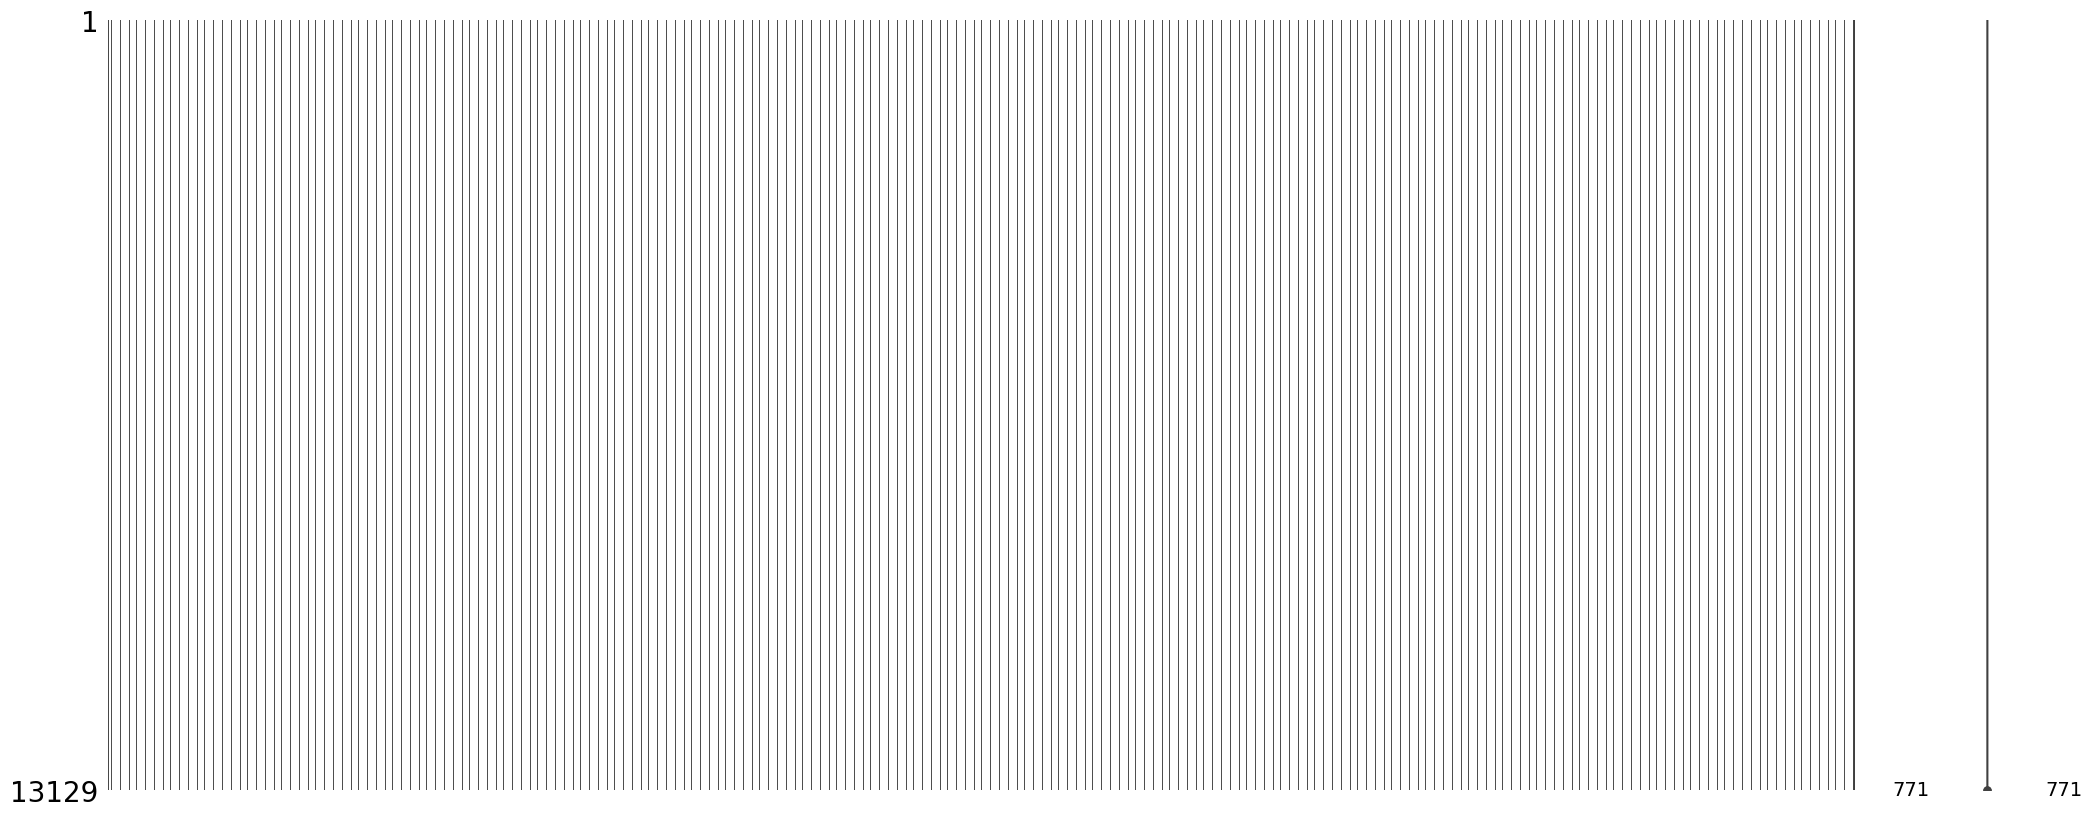

In [110]:
ms.matrix(final)

### Analysing Data

In [111]:
final.head()

track_id  acousticness  danceability    energy  instrumentalness  liveness  \
0         2      0.416675      0.675894  0.634476          0.010628  0.177647   
1         3      0.374408      0.528643  0.817461          0.001851  0.105880   
2         5      0.043567      0.745566  0.701470          0.000697  0.373143   
3        10      0.951670      0.658179  0.924525          0.965427  0.115474   
4       134      0.452217      0.513238  0.560410          0.019443  0.096567   

   speechiness    tempo   valence  artist_discovery  artist_familiarity  \
0     0.159310  165.922  0.576661          0.388990            0.386740   
1     0.461818  126.957  0.269240          0.388990            0.386740   
2     0.124595  100.260  0.621661          0.388990            0.386740   
3     0.032985  111.562  0.963590          0.557339            0.614272   
4     0.525519  114.290  0.894072          0.388990            0.386740   

   artist_hotttnesss  song_currency  song_hotttnesss       000       001  \
0           0.406370       0.000000         0.000000  0.877233  0.588911   
1           0.406370       0.000000         0.000000  0.534429  0.537414   
2           0.406370       0.000000         0.000000  0.548093  0.720192   
3           0.798387       0.005158         0.354516  0.311404  0.711402   
4           0.406370       0.000000         0.000000  0.610849  0.569169   

        002       003       004       005       006       007       008  \
0  0.354243  0.295090  0.298413  0.309430  0.304496  0.334579  0.249495   
1  0.443299  0.390879  0.344573  0.366448  0.419455  0.747766  0.460901   
2  0.389257  0.344934  0.361300  0.402543  0.434044  0.388137  0.512487   
3  0.321914  0.500601  0.250963  0.321316  0.734250  0.325188  0.373012   
4  0.428494  0.345796  0.376920  0.460590  0.401371  0.449900  0.428946   

        009       010       011    012     013    014     015     016     017  \
0  0.259656  0.318376  0.371974  1.000  0.5710  0.278  0.2100  0.2150  0.2285   
1  0.392379  0.474559  0.406729  0.506  0.5145  0.387  0.3235  0.2805  0.3135   
2  0.525755  0.425371  0.446896  0.511  0.7720  0.361  0.2880  0.3310  0.3720   
3  0.235840  0.368756  0.440775  0.263  0.7360  0.273  0.4260  0.2140  0.2880   
4  0.446736  0.479849  0.378221  0.614  0.5450  0.363  0.2800  0.3110  0.3970   

      018    019     020     021    022     023       024       025       026  \
0  0.2375  0.279  0.1685  0.1685  0.279  0.3325  0.049848  0.104212  0.060230   
1  0.3455  0.898  0.4365  0.3385  0.398  0.3480  0.079207  0.083319  0.073595   
2  0.3590  0.279  0.4430  0.4840  0.368  0.3970  0.081051  0.078300  0.048697   
3  0.8100  0.246  0.2950  0.1640  0.311  0.3860  0.033969  0.070692  0.039161   
4  0.3170  0.404  0.3560  0.3800  0.420  0.2920  0.085176  0.092242  0.073183   

        027       028       029       030       031       032       033  \
0  0.052290  0.047403  0.052815  0.052733  0.062216  0.051613  0.057399   
1  0.071024  0.056679  0.066113  0.073889  0.088100  0.071305  0.059275   
2  0.056922  0.045264  0.066819  0.094489  0.089250  0.098089  0.084133   
3  0.095781  0.024102  0.028497  0.073847  0.045103  0.065468  0.041634   
4  0.056354  0.062012  0.088343  0.077084  0.097942  0.101790  0.094533   

        034       035    036    037    038    039    040    041    042    043  \
0  0.053199  0.062583  0.036  0.018  0.017  0.021  0.021  0.010  0.015  0.041   
1  0.088222  0.067298  0.040  0.040  0.029  0.021  0.009  0.020  0.020  0.053   
2  0.068866  0.086224  0.023  0.023  0.024  0.021  0.023  0.020  0.029  0.022   
3  0.041619  0.084442  0.027  0.081  0.035  0.025  0.033  0.008  0.099  0.038   
4  0.089367  0.088544  0.003  0.012  0.003  0.004  0.010  0.015  0.005  0.006   

     044    045    046    047  048  049  050  051  052  053  054  055  056  \
0  0.010  0.009  0.021  0.013  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
1  0.022  0.032  0.034  0.028  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
2  0.040  0

In [112]:
final.shape

(13129, 771)

In [113]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13129 entries, 0 to 13128
Columns: 771 entries, track_id to track.16 number
dtypes: float64(755), int32(1), object(15)
memory usage: 77.2+ MB


In [114]:
final.drop('track.8 genres', axis=1, inplace=True)

In [115]:
final.shape

(13129, 770)

In [116]:
final.head()

track_id  acousticness  danceability    energy  instrumentalness  liveness  \
0         2      0.416675      0.675894  0.634476          0.010628  0.177647   
1         3      0.374408      0.528643  0.817461          0.001851  0.105880   
2         5      0.043567      0.745566  0.701470          0.000697  0.373143   
3        10      0.951670      0.658179  0.924525          0.965427  0.115474   
4       134      0.452217      0.513238  0.560410          0.019443  0.096567   

   speechiness    tempo   valence  artist_discovery  artist_familiarity  \
0     0.159310  165.922  0.576661          0.388990            0.386740   
1     0.461818  126.957  0.269240          0.388990            0.386740   
2     0.124595  100.260  0.621661          0.388990            0.386740   
3     0.032985  111.562  0.963590          0.557339            0.614272   
4     0.525519  114.290  0.894072          0.388990            0.386740   

   artist_hotttnesss  song_currency  song_hotttnesss       000       001  \
0           0.406370       0.000000         0.000000  0.877233  0.588911   
1           0.406370       0.000000         0.000000  0.534429  0.537414   
2           0.406370       0.000000         0.000000  0.548093  0.720192   
3           0.798387       0.005158         0.354516  0.311404  0.711402   
4           0.406370       0.000000         0.000000  0.610849  0.569169   

        002       003       004       005       006       007       008  \
0  0.354243  0.295090  0.298413  0.309430  0.304496  0.334579  0.249495   
1  0.443299  0.390879  0.344573  0.366448  0.419455  0.747766  0.460901   
2  0.389257  0.344934  0.361300  0.402543  0.434044  0.388137  0.512487   
3  0.321914  0.500601  0.250963  0.321316  0.734250  0.325188  0.373012   
4  0.428494  0.345796  0.376920  0.460590  0.401371  0.449900  0.428946   

        009       010       011    012     013    014     015     016     017  \
0  0.259656  0.318376  0.371974  1.000  0.5710  0.278  0.2100  0.2150  0.2285   
1  0.392379  0.474559  0.406729  0.506  0.5145  0.387  0.3235  0.2805  0.3135   
2  0.525755  0.425371  0.446896  0.511  0.7720  0.361  0.2880  0.3310  0.3720   
3  0.235840  0.368756  0.440775  0.263  0.7360  0.273  0.4260  0.2140  0.2880   
4  0.446736  0.479849  0.378221  0.614  0.5450  0.363  0.2800  0.3110  0.3970   

      018    019     020     021    022     023       024       025       026  \
0  0.2375  0.279  0.1685  0.1685  0.279  0.3325  0.049848  0.104212  0.060230   
1  0.3455  0.898  0.4365  0.3385  0.398  0.3480  0.079207  0.083319  0.073595   
2  0.3590  0.279  0.4430  0.4840  0.368  0.3970  0.081051  0.078300  0.048697   
3  0.8100  0.246  0.2950  0.1640  0.311  0.3860  0.033969  0.070692  0.039161   
4  0.3170  0.404  0.3560  0.3800  0.420  0.2920  0.085176  0.092242  0.073183   

        027       028       029       030       031       032       033  \
0  0.052290  0.047403  0.052815  0.052733  0.062216  0.051613  0.057399   
1  0.071024  0.056679  0.066113  0.073889  0.088100  0.071305  0.059275   
2  0.056922  0.045264  0.066819  0.094489  0.089250  0.098089  0.084133   
3  0.095781  0.024102  0.028497  0.073847  0.045103  0.065468  0.041634   
4  0.056354  0.062012  0.088343  0.077084  0.097942  0.101790  0.094533   

        034       035    036    037    038    039    040    041    042    043  \
0  0.053199  0.062583  0.036  0.018  0.017  0.021  0.021  0.010  0.015  0.041   
1  0.088222  0.067298  0.040  0.040  0.029  0.021  0.009  0.020  0.020  0.053   
2  0.068866  0.086224  0.023  0.023  0.024  0.021  0.023  0.020  0.029  0.022   
3  0.041619  0.084442  0.027  0.081  0.035  0.025  0.033  0.008  0.099  0.038   
4  0.089367  0.088544  0.003  0.012  0.003  0.004  0.010  0.015  0.005  0.006   

     044    045    046    047  048  049  050  051  052  053  054  055  056  \
0  0.010  0.009  0.021  0.013  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
1  0.022  0.032  0.034  0.028  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
2  0.040  0

In [117]:
final['track.7 genre_top'].value_counts()

track.7 genre_top
Rock                                                       3892
Electronic                                                 2170
Avant-Garde|International|                                 1902
Avant-Garde|International|Blues|                           1507
Hip-Hop                                                     910
Folk                                                        874
Old-Time / Historic                                         357
Pop                                                         346
Avant-Garde|International|Blues|Jazz|                       269
Classical                                                   265
Jazz                                                        241
International                                               133
Instrumental                                                 84
Avant-Garde|International|Blues|Jazz|Classical|              82
Blues                                                        66
Experimental          

### Feature Engineering

In [118]:
def format_strings(x):
    if '-' in x:
        return ''.join(x.split('-'))
    if x.find('/'):
        return '|'.join(x.split('/'))
    return x

In [119]:
def modifyString(serie, val):
    for i in range(0, val):
        if serie[i] == 'Old-Time / Historic':
            serie[i] = 'OldTime|Historic'
    return serie

In [120]:
final['track.7 genre_top'] = modifyString(final['track.7 genre_top'], 13129)

C:\Users\User\AppData\Local\Temp\ipykernel_1668\3930973747.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  serie[i] = 'OldTime|Historic'
C:\Users\User\AppData\Local\Temp\ipykernel_1668\3930973747.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  serie[i] = 'OldTime|Historic'
C:\Users\User\AppData\Local\Temp\ipykernel_1668\3930973747.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  serie[i] = 'OldTime|Historic'
C:\Users\User\Ap

In [121]:
final['track.7 genre_top'] = final['track.7 genre_top'].apply(format_strings)

In [122]:
final['track.7 genre_top'].value_counts()

track.7 genre_top
Rock                                                      3892
Electronic                                                2170
AvantGarde|International|                                 1902
AvantGarde|International|Blues|                           1507
HipHop                                                     910
Folk                                                       874
OldTime|Historic                                           357
Pop                                                        346
AvantGarde|International|Blues|Jazz|                       269
Classical                                                  265
Jazz                                                       241
International                                              133
Instrumental                                                84
AvantGarde|International|Blues|Jazz|Classical|              82
Blues                                                       66
Experimental                         

In [123]:
final.head()

track_id  acousticness  danceability    energy  instrumentalness  liveness  \
0         2      0.416675      0.675894  0.634476          0.010628  0.177647   
1         3      0.374408      0.528643  0.817461          0.001851  0.105880   
2         5      0.043567      0.745566  0.701470          0.000697  0.373143   
3        10      0.951670      0.658179  0.924525          0.965427  0.115474   
4       134      0.452217      0.513238  0.560410          0.019443  0.096567   

   speechiness    tempo   valence  artist_discovery  artist_familiarity  \
0     0.159310  165.922  0.576661          0.388990            0.386740   
1     0.461818  126.957  0.269240          0.388990            0.386740   
2     0.124595  100.260  0.621661          0.388990            0.386740   
3     0.032985  111.562  0.963590          0.557339            0.614272   
4     0.525519  114.290  0.894072          0.388990            0.386740   

   artist_hotttnesss  song_currency  song_hotttnesss       000       001  \
0           0.406370       0.000000         0.000000  0.877233  0.588911   
1           0.406370       0.000000         0.000000  0.534429  0.537414   
2           0.406370       0.000000         0.000000  0.548093  0.720192   
3           0.798387       0.005158         0.354516  0.311404  0.711402   
4           0.406370       0.000000         0.000000  0.610849  0.569169   

        002       003       004       005       006       007       008  \
0  0.354243  0.295090  0.298413  0.309430  0.304496  0.334579  0.249495   
1  0.443299  0.390879  0.344573  0.366448  0.419455  0.747766  0.460901   
2  0.389257  0.344934  0.361300  0.402543  0.434044  0.388137  0.512487   
3  0.321914  0.500601  0.250963  0.321316  0.734250  0.325188  0.373012   
4  0.428494  0.345796  0.376920  0.460590  0.401371  0.449900  0.428946   

        009       010       011    012     013    014     015     016     017  \
0  0.259656  0.318376  0.371974  1.000  0.5710  0.278  0.2100  0.2150  0.2285   
1  0.392379  0.474559  0.406729  0.506  0.5145  0.387  0.3235  0.2805  0.3135   
2  0.525755  0.425371  0.446896  0.511  0.7720  0.361  0.2880  0.3310  0.3720   
3  0.235840  0.368756  0.440775  0.263  0.7360  0.273  0.4260  0.2140  0.2880   
4  0.446736  0.479849  0.378221  0.614  0.5450  0.363  0.2800  0.3110  0.3970   

      018    019     020     021    022     023       024       025       026  \
0  0.2375  0.279  0.1685  0.1685  0.279  0.3325  0.049848  0.104212  0.060230   
1  0.3455  0.898  0.4365  0.3385  0.398  0.3480  0.079207  0.083319  0.073595   
2  0.3590  0.279  0.4430  0.4840  0.368  0.3970  0.081051  0.078300  0.048697   
3  0.8100  0.246  0.2950  0.1640  0.311  0.3860  0.033969  0.070692  0.039161   
4  0.3170  0.404  0.3560  0.3800  0.420  0.2920  0.085176  0.092242  0.073183   

        027       028       029       030       031       032       033  \
0  0.052290  0.047403  0.052815  0.052733  0.062216  0.051613  0.057399   
1  0.071024  0.056679  0.066113  0.073889  0.088100  0.071305  0.059275   
2  0.056922  0.045264  0.066819  0.094489  0.089250  0.098089  0.084133   
3  0.095781  0.024102  0.028497  0.073847  0.045103  0.065468  0.041634   
4  0.056354  0.062012  0.088343  0.077084  0.097942  0.101790  0.094533   

        034       035    036    037    038    039    040    041    042    043  \
0  0.053199  0.062583  0.036  0.018  0.017  0.021  0.021  0.010  0.015  0.041   
1  0.088222  0.067298  0.040  0.040  0.029  0.021  0.009  0.020  0.020  0.053   
2  0.068866  0.086224  0.023  0.023  0.024  0.021  0.023  0.020  0.029  0.022   
3  0.041619  0.084442  0.027  0.081  0.035  0.025  0.033  0.008  0.099  0.038   
4  0.089367  0.088544  0.003  0.012  0.003  0.004  0.010  0.015  0.005  0.006   

     044    045    046    047  048  049  050  051  052  053  054  055  056  \
0  0.010  0.009  0.021  0.013  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
1  0.022  0.032  0.034  0.028  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
2  0.040  0

In [124]:
metadata = pd.DataFrame()

In [125]:
metadata['track_id'] = final['track_id']

In [126]:
metadata.shape

(13129, 1)

In [127]:
track_title.shape

(106574, 2)

In [128]:
track_title = track_title.set_index('track_id')

In [129]:
track_title.head()

track.19 title
track_id                 
2                    Food
3            Electric Ave
5              This World
10                Freeway
20        Spiritual Level

In [130]:
track_title.index = [int(i) for i in track_title.index]

In [131]:
track_title.head()

track.19 title
2              Food
3      Electric Ave
5        This World
10          Freeway
20  Spiritual Level

In [132]:
metadata.head()

track_id
0         2
1         3
2         5
3        10
4       134

In [133]:
metadata['album_title'] = final['album.10 title']

In [134]:
metadata['artist_name'] = final['artist.12 name']

In [135]:
metadata['genre'] = final['track.7 genre_top']

In [136]:
metadata = metadata.set_index('track_id')

In [137]:
metadata.tail()

album_title      artist_name                      genre
track_id                                                                  
124857    Do You Know The Word            BASIC  AvantGarde|International|
124862    Do You Know The Word            BASIC  AvantGarde|International|
124863    Do You Know The Word            BASIC  AvantGarde|International|
124864    Do You Know The Word            BASIC  AvantGarde|International|
124911     Suicide Beauty Girl  Yusuke Tsutsumi  AvantGarde|International|

In [138]:
metadata.head()

album_title artist_name   genre
track_id                                          
2         AWOL - A Way Of Life        AWOL  HipHop
3         AWOL - A Way Of Life        AWOL  HipHop
5         AWOL - A Way Of Life        AWOL  HipHop
10           Constant Hitmaker   Kurt Vile     Pop
134       AWOL - A Way Of Life        AWOL  HipHop

In [139]:
metadata['track_title'] = track_title.loc[metadata.index]['track.19 title']

In [140]:
metadata.tail()

album_title      artist_name                      genre  \
track_id                                                                     
124857    Do You Know The Word            BASIC  AvantGarde|International|   
124862    Do You Know The Word            BASIC  AvantGarde|International|   
124863    Do You Know The Word            BASIC  AvantGarde|International|   
124864    Do You Know The Word            BASIC  AvantGarde|International|   
124911     Suicide Beauty Girl  Yusuke Tsutsumi  AvantGarde|International|   

                           track_title  
track_id                                
124857    I'm Wearing My Dancing Pants  
124862               Me Funky You Jane  
124863                 Ain't Mad at Ya  
124864             This Is Not the End  
124911                          Heaven

In [141]:
metadata.head()

album_title artist_name   genre   track_title
track_id                                                        
2         AWOL - A Way Of Life        AWOL  HipHop          Food
3         AWOL - A Way Of Life        AWOL  HipHop  Electric Ave
5         AWOL - A Way Of Life        AWOL  HipHop    This World
10           Constant Hitmaker   Kurt Vile     Pop       Freeway
134       AWOL - A Way Of Life        AWOL  HipHop  Street Music

In [142]:
len(metadata[metadata['genre'].isnull()])

0

In [143]:
final.drop('album.10 title', axis=1, inplace=True)

In [144]:
final.head()

track_id  acousticness  danceability    energy  instrumentalness  liveness  \
0         2      0.416675      0.675894  0.634476          0.010628  0.177647   
1         3      0.374408      0.528643  0.817461          0.001851  0.105880   
2         5      0.043567      0.745566  0.701470          0.000697  0.373143   
3        10      0.951670      0.658179  0.924525          0.965427  0.115474   
4       134      0.452217      0.513238  0.560410          0.019443  0.096567   

   speechiness    tempo   valence  artist_discovery  artist_familiarity  \
0     0.159310  165.922  0.576661          0.388990            0.386740   
1     0.461818  126.957  0.269240          0.388990            0.386740   
2     0.124595  100.260  0.621661          0.388990            0.386740   
3     0.032985  111.562  0.963590          0.557339            0.614272   
4     0.525519  114.290  0.894072          0.388990            0.386740   

   artist_hotttnesss  song_currency  song_hotttnesss       000       001  \
0           0.406370       0.000000         0.000000  0.877233  0.588911   
1           0.406370       0.000000         0.000000  0.534429  0.537414   
2           0.406370       0.000000         0.000000  0.548093  0.720192   
3           0.798387       0.005158         0.354516  0.311404  0.711402   
4           0.406370       0.000000         0.000000  0.610849  0.569169   

        002       003       004       005       006       007       008  \
0  0.354243  0.295090  0.298413  0.309430  0.304496  0.334579  0.249495   
1  0.443299  0.390879  0.344573  0.366448  0.419455  0.747766  0.460901   
2  0.389257  0.344934  0.361300  0.402543  0.434044  0.388137  0.512487   
3  0.321914  0.500601  0.250963  0.321316  0.734250  0.325188  0.373012   
4  0.428494  0.345796  0.376920  0.460590  0.401371  0.449900  0.428946   

        009       010       011    012     013    014     015     016     017  \
0  0.259656  0.318376  0.371974  1.000  0.5710  0.278  0.2100  0.2150  0.2285   
1  0.392379  0.474559  0.406729  0.506  0.5145  0.387  0.3235  0.2805  0.3135   
2  0.525755  0.425371  0.446896  0.511  0.7720  0.361  0.2880  0.3310  0.3720   
3  0.235840  0.368756  0.440775  0.263  0.7360  0.273  0.4260  0.2140  0.2880   
4  0.446736  0.479849  0.378221  0.614  0.5450  0.363  0.2800  0.3110  0.3970   

      018    019     020     021    022     023       024       025       026  \
0  0.2375  0.279  0.1685  0.1685  0.279  0.3325  0.049848  0.104212  0.060230   
1  0.3455  0.898  0.4365  0.3385  0.398  0.3480  0.079207  0.083319  0.073595   
2  0.3590  0.279  0.4430  0.4840  0.368  0.3970  0.081051  0.078300  0.048697   
3  0.8100  0.246  0.2950  0.1640  0.311  0.3860  0.033969  0.070692  0.039161   
4  0.3170  0.404  0.3560  0.3800  0.420  0.2920  0.085176  0.092242  0.073183   

        027       028       029       030       031       032       033  \
0  0.052290  0.047403  0.052815  0.052733  0.062216  0.051613  0.057399   
1  0.071024  0.056679  0.066113  0.073889  0.088100  0.071305  0.059275   
2  0.056922  0.045264  0.066819  0.094489  0.089250  0.098089  0.084133   
3  0.095781  0.024102  0.028497  0.073847  0.045103  0.065468  0.041634   
4  0.056354  0.062012  0.088343  0.077084  0.097942  0.101790  0.094533   

        034       035    036    037    038    039    040    041    042    043  \
0  0.053199  0.062583  0.036  0.018  0.017  0.021  0.021  0.010  0.015  0.041   
1  0.088222  0.067298  0.040  0.040  0.029  0.021  0.009  0.020  0.020  0.053   
2  0.068866  0.086224  0.023  0.023  0.024  0.021  0.023  0.020  0.029  0.022   
3  0.041619  0.084442  0.027  0.081  0.035  0.025  0.033  0.008  0.099  0.038   
4  0.089367  0.088544  0.003  0.012  0.003  0.004  0.010  0.015  0.005  0.006   

     044    045    046    047  048  049  050  051  052  053  054  055  056  \
0  0.010  0.009  0.021  0.013  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
1  0.022  0.032  0.034  0.028  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
2  0.040  0

In [145]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13129 entries, 0 to 13128
Columns: 769 entries, track_id to track.16 number
dtypes: float64(755), int32(1), object(13)
memory usage: 77.0+ MB


In [146]:
final.drop('artist.12 name', axis=1, inplace=True)

In [147]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13129 entries, 0 to 13128
Columns: 768 entries, track_id to track.16 number
dtypes: float64(755), int32(1), object(12)
memory usage: 76.9+ MB


In [148]:
final.head()

track_id  acousticness  danceability    energy  instrumentalness  liveness  \
0         2      0.416675      0.675894  0.634476          0.010628  0.177647   
1         3      0.374408      0.528643  0.817461          0.001851  0.105880   
2         5      0.043567      0.745566  0.701470          0.000697  0.373143   
3        10      0.951670      0.658179  0.924525          0.965427  0.115474   
4       134      0.452217      0.513238  0.560410          0.019443  0.096567   

   speechiness    tempo   valence  artist_discovery  artist_familiarity  \
0     0.159310  165.922  0.576661          0.388990            0.386740   
1     0.461818  126.957  0.269240          0.388990            0.386740   
2     0.124595  100.260  0.621661          0.388990            0.386740   
3     0.032985  111.562  0.963590          0.557339            0.614272   
4     0.525519  114.290  0.894072          0.388990            0.386740   

   artist_hotttnesss  song_currency  song_hotttnesss       000       001  \
0           0.406370       0.000000         0.000000  0.877233  0.588911   
1           0.406370       0.000000         0.000000  0.534429  0.537414   
2           0.406370       0.000000         0.000000  0.548093  0.720192   
3           0.798387       0.005158         0.354516  0.311404  0.711402   
4           0.406370       0.000000         0.000000  0.610849  0.569169   

        002       003       004       005       006       007       008  \
0  0.354243  0.295090  0.298413  0.309430  0.304496  0.334579  0.249495   
1  0.443299  0.390879  0.344573  0.366448  0.419455  0.747766  0.460901   
2  0.389257  0.344934  0.361300  0.402543  0.434044  0.388137  0.512487   
3  0.321914  0.500601  0.250963  0.321316  0.734250  0.325188  0.373012   
4  0.428494  0.345796  0.376920  0.460590  0.401371  0.449900  0.428946   

        009       010       011    012     013    014     015     016     017  \
0  0.259656  0.318376  0.371974  1.000  0.5710  0.278  0.2100  0.2150  0.2285   
1  0.392379  0.474559  0.406729  0.506  0.5145  0.387  0.3235  0.2805  0.3135   
2  0.525755  0.425371  0.446896  0.511  0.7720  0.361  0.2880  0.3310  0.3720   
3  0.235840  0.368756  0.440775  0.263  0.7360  0.273  0.4260  0.2140  0.2880   
4  0.446736  0.479849  0.378221  0.614  0.5450  0.363  0.2800  0.3110  0.3970   

      018    019     020     021    022     023       024       025       026  \
0  0.2375  0.279  0.1685  0.1685  0.279  0.3325  0.049848  0.104212  0.060230   
1  0.3455  0.898  0.4365  0.3385  0.398  0.3480  0.079207  0.083319  0.073595   
2  0.3590  0.279  0.4430  0.4840  0.368  0.3970  0.081051  0.078300  0.048697   
3  0.8100  0.246  0.2950  0.1640  0.311  0.3860  0.033969  0.070692  0.039161   
4  0.3170  0.404  0.3560  0.3800  0.420  0.2920  0.085176  0.092242  0.073183   

        027       028       029       030       031       032       033  \
0  0.052290  0.047403  0.052815  0.052733  0.062216  0.051613  0.057399   
1  0.071024  0.056679  0.066113  0.073889  0.088100  0.071305  0.059275   
2  0.056922  0.045264  0.066819  0.094489  0.089250  0.098089  0.084133   
3  0.095781  0.024102  0.028497  0.073847  0.045103  0.065468  0.041634   
4  0.056354  0.062012  0.088343  0.077084  0.097942  0.101790  0.094533   

        034       035    036    037    038    039    040    041    042    043  \
0  0.053199  0.062583  0.036  0.018  0.017  0.021  0.021  0.010  0.015  0.041   
1  0.088222  0.067298  0.040  0.040  0.029  0.021  0.009  0.020  0.020  0.053   
2  0.068866  0.086224  0.023  0.023  0.024  0.021  0.023  0.020  0.029  0.022   
3  0.041619  0.084442  0.027  0.081  0.035  0.025  0.033  0.008  0.099  0.038   
4  0.089367  0.088544  0.003  0.012  0.003  0.004  0.010  0.015  0.005  0.006   

     044    045    046    047  048  049  050  051  052  053  054  055  056  \
0  0.010  0.009  0.021  0.013  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
1  0.022  0.032  0.034  0.028  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
2  0.040  0

In [149]:
k = final # Restore point # Removed Label Encoding

In [150]:
final.head()

track_id  acousticness  danceability    energy  instrumentalness  liveness  \
0         2      0.416675      0.675894  0.634476          0.010628  0.177647   
1         3      0.374408      0.528643  0.817461          0.001851  0.105880   
2         5      0.043567      0.745566  0.701470          0.000697  0.373143   
3        10      0.951670      0.658179  0.924525          0.965427  0.115474   
4       134      0.452217      0.513238  0.560410          0.019443  0.096567   

   speechiness    tempo   valence  artist_discovery  artist_familiarity  \
0     0.159310  165.922  0.576661          0.388990            0.386740   
1     0.461818  126.957  0.269240          0.388990            0.386740   
2     0.124595  100.260  0.621661          0.388990            0.386740   
3     0.032985  111.562  0.963590          0.557339            0.614272   
4     0.525519  114.290  0.894072          0.388990            0.386740   

   artist_hotttnesss  song_currency  song_hotttnesss       000       001  \
0           0.406370       0.000000         0.000000  0.877233  0.588911   
1           0.406370       0.000000         0.000000  0.534429  0.537414   
2           0.406370       0.000000         0.000000  0.548093  0.720192   
3           0.798387       0.005158         0.354516  0.311404  0.711402   
4           0.406370       0.000000         0.000000  0.610849  0.569169   

        002       003       004       005       006       007       008  \
0  0.354243  0.295090  0.298413  0.309430  0.304496  0.334579  0.249495   
1  0.443299  0.390879  0.344573  0.366448  0.419455  0.747766  0.460901   
2  0.389257  0.344934  0.361300  0.402543  0.434044  0.388137  0.512487   
3  0.321914  0.500601  0.250963  0.321316  0.734250  0.325188  0.373012   
4  0.428494  0.345796  0.376920  0.460590  0.401371  0.449900  0.428946   

        009       010       011    012     013    014     015     016     017  \
0  0.259656  0.318376  0.371974  1.000  0.5710  0.278  0.2100  0.2150  0.2285   
1  0.392379  0.474559  0.406729  0.506  0.5145  0.387  0.3235  0.2805  0.3135   
2  0.525755  0.425371  0.446896  0.511  0.7720  0.361  0.2880  0.3310  0.3720   
3  0.235840  0.368756  0.440775  0.263  0.7360  0.273  0.4260  0.2140  0.2880   
4  0.446736  0.479849  0.378221  0.614  0.5450  0.363  0.2800  0.3110  0.3970   

      018    019     020     021    022     023       024       025       026  \
0  0.2375  0.279  0.1685  0.1685  0.279  0.3325  0.049848  0.104212  0.060230   
1  0.3455  0.898  0.4365  0.3385  0.398  0.3480  0.079207  0.083319  0.073595   
2  0.3590  0.279  0.4430  0.4840  0.368  0.3970  0.081051  0.078300  0.048697   
3  0.8100  0.246  0.2950  0.1640  0.311  0.3860  0.033969  0.070692  0.039161   
4  0.3170  0.404  0.3560  0.3800  0.420  0.2920  0.085176  0.092242  0.073183   

        027       028       029       030       031       032       033  \
0  0.052290  0.047403  0.052815  0.052733  0.062216  0.051613  0.057399   
1  0.071024  0.056679  0.066113  0.073889  0.088100  0.071305  0.059275   
2  0.056922  0.045264  0.066819  0.094489  0.089250  0.098089  0.084133   
3  0.095781  0.024102  0.028497  0.073847  0.045103  0.065468  0.041634   
4  0.056354  0.062012  0.088343  0.077084  0.097942  0.101790  0.094533   

        034       035    036    037    038    039    040    041    042    043  \
0  0.053199  0.062583  0.036  0.018  0.017  0.021  0.021  0.010  0.015  0.041   
1  0.088222  0.067298  0.040  0.040  0.029  0.021  0.009  0.020  0.020  0.053   
2  0.068866  0.086224  0.023  0.023  0.024  0.021  0.023  0.020  0.029  0.022   
3  0.041619  0.084442  0.027  0.081  0.035  0.025  0.033  0.008  0.099  0.038   
4  0.089367  0.088544  0.003  0.012  0.003  0.004  0.010  0.015  0.005  0.006   

     044    045    046    047  048  049  050  051  052  053  054  055  056  \
0  0.010  0.009  0.021  0.013  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
1  0.022  0.032  0.034  0.028  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
2  0.040  0

In [151]:
final.drop('set split', axis=1, inplace=True)

In [152]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13129 entries, 0 to 13128
Columns: 767 entries, track_id to track.16 number
dtypes: float64(755), int32(1), object(11)
memory usage: 76.8+ MB


In [153]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13129 entries, 0 to 13128
Columns: 767 entries, track_id to track.16 number
dtypes: float64(755), int32(1), object(11)
memory usage: 76.8+ MB


In [154]:
genres['title'].count()

163

In [155]:
genre_dummy = pd.DataFrame(data= np.zeros((13129, 163)), columns= list(genres['title'].unique()))

In [156]:
genre_dummy.head()

Avant-Garde  International  Blues  Jazz  Classical  Novelty  Comedy  \
0          0.0            0.0    0.0   0.0        0.0      0.0     0.0   
1          0.0            0.0    0.0   0.0        0.0      0.0     0.0   
2          0.0            0.0    0.0   0.0        0.0      0.0     0.0   
3          0.0            0.0    0.0   0.0        0.0      0.0     0.0   
4          0.0            0.0    0.0   0.0        0.0      0.0     0.0   

   Old-Time / Historic  Country  Pop  Disco  Rock  Easy Listening  Soul-RnB  \
0                  0.0      0.0  0.0    0.0   0.0             0.0       0.0   
1                  0.0      0.0  0.0    0.0   0.0             0.0       0.0   
2                  0.0      0.0  0.0    0.0   0.0             0.0       0.0   
3                  0.0      0.0  0.0    0.0   0.0             0.0       0.0   
4                  0.0      0.0  0.0    0.0   0.0             0.0       0.0   

   Electronic  Sound Effects  Folk  Soundtrack  Funk  Spoken  Hip-Hop  \
0         0.0            0.0   0.0         0.0   0.0     0.0      0.0   
1         0.0            0.0   0.0         0.0   0.0     0.0      0.0   
2         0.0            0.0   0.0         0.0   0.0     0.0      0.0   
3         0.0            0.0   0.0         0.0   0.0     0.0      0.0   
4         0.0            0.0   0.0         0.0   0.0     0.0      0.0   

   Audio Collage  Punk  Post-Rock  Lo-Fi  Field Recordings  Metal  Noise  \
0            0.0   0.0        0.0    0.0               0.0    0.0    0.0   
1            0.0   0.0        0.0    0.0               0.0    0.0    0.0   
2            0.0   0.0        0.0    0.0               0.0    0.0    0.0   
3            0.0   0.0        0.0    0.0               0.0    0.0    0.0   
4            0.0   0.0        0.0    0.0               0.0    0.0    0.0   

   Psych-Folk  Krautrock  Jazz: Vocal  Experimental  Electroacoustic  \
0         0.0        0.0          0.0           0.0              0.0   
1         0.0        0.0          0.0           0.0              0.0   
2         0.0        0.0          0.0           0.0              0.0   
3         0.0        0.0          0.0           0.0              0.0   
4         0.0        0.0          0.0           0.0              0.0   

   Ambient Electronic  Radio Art  Loud-Rock  Latin America  Drone  Free-Folk  \
0                 0.0        0.0        0.0            0.0    0.0        0.0   
1                 0.0        0.0        0.0            0.0    0.0        0.0   
2                 0.0        0.0        0.0            0.0    0.0        0.0   
3                 0.0        0.0        0.0            0.0    0.0        0.0   
4                 0.0        0.0        0.0            0.0    0.0        0.0   

   Noise-Rock  Psych-Rock  Bluegrass  Electro-Punk  Radio  Indie-Rock  \
0         0.0         0.0        0.0           0.0    0.0         0.0   
1         0.0         0.0        0.0           0.0    0.0         0.0   
2         0.0         0.0        0.0           0.0    0.0         0.0   
3         0.0         0.0        0.0           0.0    0.0         0.0   
4         0.0         0.0        0.0           0.0    0.0         0.0   

   Industrial  No Wave  Free-Jazz  Experimental Pop  French  Reggae - Dub  \
0         0.0      0.0        0.0               0.0     0.0           0.0   
1         0.0      0.0        0.0               0.0     0.0           0.0   
2         0.0      0.0        0.0               0.0     0.0           0.0   
3         0.0      0.0        0.0               0.0     0.0           0.0   
4         0.0      0.0        0.0               0.0     0.0           0.0   

   Afrobeat  Nerdcore  Garage  Indian  New Wave  Post-Punk  Sludge  African  \
0       0.0       0.0     0.0     0.0       0.0        0.0     0.0      0.0   
1       0.0       0.0     0.0     0.0       0.0        0.0     0.0      0.0   
2       0.0       0.0     0.0     0.0       0.0        0.0     0.0      0.0   
3       0.0       0.0     0.0     0.0       0.0        

In [157]:
genre_list = pd.Series(data= genre_dummy.columns)

In [158]:
genre_list = modifyString(genre_list, 163)

In [159]:
genre_list = genre_list.apply(format_strings)

In [160]:
genre_dummy.columns= genre_list

In [161]:
# columns converted successfully

In [162]:
genre_list = list(genre_list)

In [163]:
final

track_id  acousticness  danceability    energy  instrumentalness  \
0             2      0.416675      0.675894  0.634476          0.010628   
1             3      0.374408      0.528643  0.817461          0.001851   
2             5      0.043567      0.745566  0.701470          0.000697   
3            10      0.951670      0.658179  0.924525          0.965427   
4           134      0.452217      0.513238  0.560410          0.019443   
...         ...           ...           ...       ...               ...   
13124    124857      0.007592      0.790364  0.719288          0.853114   
13125    124862      0.041498      0.843077  0.536496          0.865151   
13126    124863      0.000124      0.609686  0.895136          0.846624   
13127    124864      0.327576      0.574426  0.548327          0.452867   
13128    124911      0.993606      0.499339  0.050622          0.945677   

       liveness  speechiness    tempo   valence  artist_discovery  \
0      0.177647     0.159310  165.922  0.576661          0.388990   
1      0.105880     0.461818  126.957  0.269240          0.388990   
2      0.373143     0.124595  100.260  0.621661          0.388990   
3      0.115474     0.032985  111.562  0.963590          0.557339   
4      0.096567     0.525519  114.290  0.894072          0.388990   
...         ...          ...      ...       ...               ...   
13124  0.720715     0.082550  141.332  0.890461          0.430808   
13125  0.547949     0.074001  101.975  0.476845          0.430808   
13126  0.632903     0.051517  129.996  0.496667          0.430808   
13127  0.075928     0.033388  142.009  0.569274          0.430808   
13128  0.095965     0.065189  119.965  0.204652          0.450229   

       artist_familiarity  artist_hotttnesss  song_currency  song_hotttnesss  \
0                0.386740           0.406370       0.000000         0.000000   
1                0.386740           0.406370       0.000000         0.000000   
2                0.386740           0.406370       0.000000         0.000000   
3                0.614272           0.798387       0.005158         0.354516   
4                0.386740           0.406370       0.000000         0.000000   
...                   ...                ...            ...              ...   
13124            0.456871           0.486749       0.000000         0.000000   
13125            0.456871           0.486749       0.000000         0.000000   
13126            0.456871           0.486749       0.000000         0.000000   
13127            0.456871           0.486749       0.000000         0.000000   
13128            0.274787           0.470345       0.000061         0.068649   

            000       001       002       003       004       005       006  \
0      0.877233  0.588911  0.354243  0.295090  0.298413  0.309430  0.304496   
1      0.534429  0.537414  0.443299  0.390879  0.344573  0.366448  0.419455   
2      0.548093  0.720192  0.389257  0.344934  0.361300  0.402543  0.434044   
3      0.311404  0.711402  0.321914  0.500601  0.250963  0.321316  0.734250   
4      0.610849  0.569169  0.428494  0.345796  0.376920  0.460590  0.401371   
...         ...       ...       ...       ...       ...       ...       ...   
13124  0.717013  0.686557  0.411056  0.342718  0.341934  0.482926  0.419219   
13125  0.673395  0.846995  0.447772  0.425936  0.407817  0.405924  0.290565   
13126  0.842368  0.719091  0.351503  0.354707  0.314619  0.276266  0.340571   
13127  0.346748  0.311817  0.220864  0.185269  0.333642  0.290699  0.558345   
13128  0.319693  0.164967  0.071792  0.426253  0.068991  0.226611  0.076166   

            007       008       009       010       011     012     013  \
0      0.334579  0.249495  0.259656  0.318376  0.371974  1.0000  0.5710   
1      0.747766  0.460901  0.392379  0.474559  0.406729  0.5060  0.5145   
2      0.388137  0.512487  0.525755  0.425371  0.446896  0.5110  0.7720   
3      0.325188  0.373012  0.235840  0.368756  0.440775  0.2630  0.

In [164]:
for i in range(0, 13129):
    if '|' in final['track.7 genre_top'][i]:
        divided_list = str(final['track.7 genre_top'][i]).split('|')
        count = len(divided_list)
        for j in range(0, count):
            if divided_list[j] in genre_list:
                location = genre_list.index(divided_list[j])
                genre_dummy.iloc[i, location] = 1
    else:
        location = genre_list.index(final['track.7 genre_top'][i])
        genre_dummy.iloc[i, location] = 1

In [165]:
genre_list.index(final['track.7 genre_top'][0])

20

In [166]:
final.drop(['track.7 genre_top'], axis= 1, inplace= True)

In [167]:
final = pd.concat([final, genre_dummy], axis= 1)

In [168]:
final.head()

track_id  acousticness  danceability    energy  instrumentalness  liveness  \
0         2      0.416675      0.675894  0.634476          0.010628  0.177647   
1         3      0.374408      0.528643  0.817461          0.001851  0.105880   
2         5      0.043567      0.745566  0.701470          0.000697  0.373143   
3        10      0.951670      0.658179  0.924525          0.965427  0.115474   
4       134      0.452217      0.513238  0.560410          0.019443  0.096567   

   speechiness    tempo   valence  artist_discovery  artist_familiarity  \
0     0.159310  165.922  0.576661          0.388990            0.386740   
1     0.461818  126.957  0.269240          0.388990            0.386740   
2     0.124595  100.260  0.621661          0.388990            0.386740   
3     0.032985  111.562  0.963590          0.557339            0.614272   
4     0.525519  114.290  0.894072          0.388990            0.386740   

   artist_hotttnesss  song_currency  song_hotttnesss       000       001  \
0           0.406370       0.000000         0.000000  0.877233  0.588911   
1           0.406370       0.000000         0.000000  0.534429  0.537414   
2           0.406370       0.000000         0.000000  0.548093  0.720192   
3           0.798387       0.005158         0.354516  0.311404  0.711402   
4           0.406370       0.000000         0.000000  0.610849  0.569169   

        002       003       004       005       006       007       008  \
0  0.354243  0.295090  0.298413  0.309430  0.304496  0.334579  0.249495   
1  0.443299  0.390879  0.344573  0.366448  0.419455  0.747766  0.460901   
2  0.389257  0.344934  0.361300  0.402543  0.434044  0.388137  0.512487   
3  0.321914  0.500601  0.250963  0.321316  0.734250  0.325188  0.373012   
4  0.428494  0.345796  0.376920  0.460590  0.401371  0.449900  0.428946   

        009       010       011    012     013    014     015     016     017  \
0  0.259656  0.318376  0.371974  1.000  0.5710  0.278  0.2100  0.2150  0.2285   
1  0.392379  0.474559  0.406729  0.506  0.5145  0.387  0.3235  0.2805  0.3135   
2  0.525755  0.425371  0.446896  0.511  0.7720  0.361  0.2880  0.3310  0.3720   
3  0.235840  0.368756  0.440775  0.263  0.7360  0.273  0.4260  0.2140  0.2880   
4  0.446736  0.479849  0.378221  0.614  0.5450  0.363  0.2800  0.3110  0.3970   

      018    019     020     021    022     023       024       025       026  \
0  0.2375  0.279  0.1685  0.1685  0.279  0.3325  0.049848  0.104212  0.060230   
1  0.3455  0.898  0.4365  0.3385  0.398  0.3480  0.079207  0.083319  0.073595   
2  0.3590  0.279  0.4430  0.4840  0.368  0.3970  0.081051  0.078300  0.048697   
3  0.8100  0.246  0.2950  0.1640  0.311  0.3860  0.033969  0.070692  0.039161   
4  0.3170  0.404  0.3560  0.3800  0.420  0.2920  0.085176  0.092242  0.073183   

        027       028       029       030       031       032       033  \
0  0.052290  0.047403  0.052815  0.052733  0.062216  0.051613  0.057399   
1  0.071024  0.056679  0.066113  0.073889  0.088100  0.071305  0.059275   
2  0.056922  0.045264  0.066819  0.094489  0.089250  0.098089  0.084133   
3  0.095781  0.024102  0.028497  0.073847  0.045103  0.065468  0.041634   
4  0.056354  0.062012  0.088343  0.077084  0.097942  0.101790  0.094533   

        034       035    036    037    038    039    040    041    042    043  \
0  0.053199  0.062583  0.036  0.018  0.017  0.021  0.021  0.010  0.015  0.041   
1  0.088222  0.067298  0.040  0.040  0.029  0.021  0.009  0.020  0.020  0.053   
2  0.068866  0.086224  0.023  0.023  0.024  0.021  0.023  0.020  0.029  0.022   
3  0.041619  0.084442  0.027  0.081  0.035  0.025  0.033  0.008  0.099  0.038   
4  0.089367  0.088544  0.003  0.012  0.003  0.004  0.010  0.015  0.005  0.006   

     044    045    046    047  048  049  050  051  052  053  054  055  056  \
0  0.010  0.009  0.021  0.013  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
1  0.022  0.032  0.034  0.028  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
2  0.040  0

### Writing final data to .csv files

In [169]:
import os

if not os.path.isdir(os.path.join('datasets','final')):
    os.makedirs(os.path.join('datasets','final'))
    
metadata.to_csv('datasets/final/metadata.csv')
final.to_csv('datasets/final/final.csv')